## July 05 2021

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [4]:
start_time = time.time()
df = pd.read_feather('D:/big-datasets/internship-telkom/tiket_internet_Jan_June_2021.ftr')
print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 16.019833087921143


In [5]:
df.head()

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
0,2021-06-19 12:30:31,2021-06-19 15:54:44,IN101933857,Tidak Bisa Browsing - 2P / 3P Mati Total,[/ardiansyah/] 2/3P mati total [A_INTERNET][DCS],0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,NUNUKAN,47,6,INETR3M3,3M,Residensial,5.0
1,2021-05-24 14:32:10,None,IN99840378,Tidak Bisa Browsing - Tidak Bisa Koneksi,[/Arlianasari/] Tidak bisa browsing [A_INTERNE...,1,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,BALIKPAPAN,45,6,INETF10M,10M,Prime Cluster,28.0
2,2021-04-04 11:27:17,2021-04-04 17:55:49,IN94701817,Tidak Bisa Browsing - 2P / 3P Mati Total,[/atok/] 2/3P mati total [A_INTERNET][DCS],0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,JAMBI,6,1,INETF10M,10M,Residensial,18.0
3,2021-06-26 21:09:49,None,IN102601892,Bisa Browsing - Lambat,[/CAHYONO/] T1 / / COM / cahyono / / inet lam...,0,,,Ramah,KUJANG,19,2,INETF20M,20M,Prime Cluster,109.0
4,2021-06-15 11:02:32,None,IN101590273,Bisa Browsing - Lambat,[/bapak yudha/] T1 / / COM / bapak yudha / / ...,0,,,Marah,BLITAR,35,5,INETF20M,20M,Residensial,140.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688763 entries, 0 to 2688762
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   reportdate        object 
 1   resolvedate       object 
 2   ticketid          object 
 3   gangguan          object 
 4   trouble_headline  object 
 5   is_gamas          object 
 6   task              object 
 7   solution          object 
 8   emosi             object 
 9   datel             object 
 10  cwitel            object 
 11  reg               object 
 12  citem_speed       object 
 13  speed_id          object 
 14  lcat              object 
 15  los_inet          float64
dtypes: float64(1), object(15)
memory usage: 328.2+ MB


In [7]:
df['task'].value_counts()

Perbaikan FIBER                 1072845
                                1053686
Perbaikan COPPER                 486582
Perbaikan Internet Pelanggan      46214
Perbaikan Telepon Pelanggan       25655
                                 ...   
RIZ80152703                           1
TAW2BGESJAKPUS047                     1
a                                     1
GANTI STB                             1
F2CKGA65                              1
Name: task, Length: 63, dtype: int64

1053686 blank space, not None

In [8]:
df['solution'].value_counts()

MODEM/ONT KENA PETIR/MATI/RUSAK                 1099138
                                                 933684
KABEL/KONEKTOR RJ11 RUSAK                        490169
INTERNET - CPE                                    25539
SETTING ULANG MODEM/ONT                           22005
                                                 ...   
TRUNK LOGIC                                           1
Non Numbering SUMUT TIMUR (PEMATANG SIANTAR)          1
CATU DAYA MSAN                                        1
PATCH CORD ODF                                        1
LINK ISP                                              1
Name: solution, Length: 232, dtype: int64

933684 blank space, not None

In [9]:
df['solution'][df['solution'].str.lower() == 'traffic tinggi']

2266012    TRAFFIC TINGGI
Name: solution, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688763 entries, 0 to 2688762
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   reportdate        object 
 1   resolvedate       object 
 2   ticketid          object 
 3   gangguan          object 
 4   trouble_headline  object 
 5   is_gamas          object 
 6   task              object 
 7   solution          object 
 8   emosi             object 
 9   datel             object 
 10  cwitel            object 
 11  reg               object 
 12  citem_speed       object 
 13  speed_id          object 
 14  lcat              object 
 15  los_inet          float64
dtypes: float64(1), object(15)
memory usage: 328.2+ MB


In [11]:
df['gangguan'][df['gangguan'].str.lower().str.contains('lambat')]

3          Bisa Browsing - Lambat
4          Bisa Browsing - Lambat
15         Bisa Browsing - Lambat
16         Bisa Browsing - Lambat
18         Bisa Browsing - Lambat
                    ...          
2688743    Bisa Browsing - Lambat
2688745    Bisa Browsing - Lambat
2688752    Bisa Browsing - Lambat
2688759    Bisa Browsing - Lambat
2688761    Bisa Browsing - Lambat
Name: gangguan, Length: 711828, dtype: object

In [12]:
df_lambat = df[df['gangguan'].str.lower().str.contains('lambat')]

In [13]:
df_lambat.head()

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
3,2021-06-26 21:09:49,None,IN102601892,Bisa Browsing - Lambat,[/CAHYONO/] T1 / / COM / cahyono / / inet lam...,0,,,Ramah,KUJANG,19,2,INETF20M,20M,Prime Cluster,109.0
4,2021-06-15 11:02:32,None,IN101590273,Bisa Browsing - Lambat,[/bapak yudha/] T1 / / COM / bapak yudha / / ...,0,,,Marah,BLITAR,35,5,INETF20M,20M,Residensial,140.0
15,2021-04-18 17:07:53,None,IN96810226,Bisa Browsing - Lambat,[/TALITA/] / sosmed / via email / talita.sury...,0,,,Marah,PASAR BARU,18,2,INETF20M,20M,Prime Cluster,13.0
16,2021-06-01 20:36:59,None,IN100493623,Bisa Browsing - Lambat,[/VENUS/] T1/ / COM/ bp venus / / inet lambat...,0,,,Ramah,JAKPUS,14,2,INETC40M,40M,Prime Cluster,27.0
18,2021-06-22 07:49:32,None,IN102163894,Bisa Browsing - Lambat,[/BU SITI/] T1/ / com/ bu siti / / ganti pass...,0,,,Ramah,SORONG,60,7,INETF10M,10M,Residensial,12.0


In [14]:
df_lambat['task'] = df_lambat['task'].replace('', np.nan)
df_lambat['solution'] = df_lambat['solution'].replace('', np.nan)

In [15]:
df_lambat = df_lambat.replace({np.nan: None})

In [16]:
df_lambat.isna().sum()

reportdate               0
resolvedate         530092
ticketid                 0
gangguan                 0
trouble_headline         0
is_gamas                 0
task                624363
solution            613576
emosi                    0
datel                    0
cwitel                   0
reg                      0
citem_speed              0
speed_id                 0
lcat                     0
los_inet              1779
dtype: int64

In [17]:
df_lambat.reset_index(drop=True, inplace=True)

In [18]:
df_lambat['los_inet'] = df_lambat['los_inet'].dropna().astype(int)

In [19]:
df_lambat['los_inet'].value_counts(bins=10)

(-0.207, 20.6]    271152
(20.6, 41.2]      198754
(41.2, 61.8]       94475
(61.8, 82.4]       69297
(82.4, 103.0]      29021
(103.0, 123.6]     21245
(123.6, 144.2]     15833
(144.2, 164.8]      8279
(164.8, 185.4]      1852
(185.4, 206.0]       141
Name: los_inet, dtype: int64

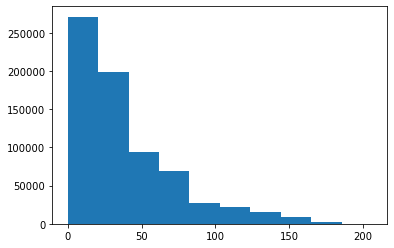

In [20]:
plt.hist(df_lambat['los_inet'], bins=10)
plt.show()

In [21]:
df_lambat[['datel', 'cwitel', 'los_inet']][df_lambat['los_inet'] > 50]

,datel,cwitel,los_inet
0,KUJANG,19,109.0
1,BLITAR,35,140.0
5,MALANG,36,51.0
6,BALIKPAPAN,45,70.0
11,SUMEDANG,23,74.0
...,...,...,...
711812,RIDAR,5,108.0
711813,MAKASSAR,52,73.0
711815,CIBINONG,19,103.0
711821,BALIKPAPAN,45,64.0


In [22]:
df_lambat['datel'].value_counts().head(15)

JAKTIM              40444
JAKUT               33209
JAKSEL              29715
JAKBAR              27821
BEKASI              26578
CIPUTAT             17903
SURABAYA UTARA      17078
MEDAN               15958
JAKPUS              15468
DEPOK               14282
BANDUNG             13882
PASAR BARU          13131
SEMARANG            12271
YOGYAKARTA          12094
SURABAYA SELATAN    12062
Name: datel, dtype: int64

In [23]:
df_lambat['datel'].nunique()

207

In [24]:
df_lambat['cwitel'].nunique()

62

In [25]:
jkt = df_lambat[(df_lambat['datel'] == 'JAKTIM') | 
          (df_lambat['datel'] == 'JAKUT') | 
          (df_lambat['datel'] == 'JAKSEL') |
          (df_lambat['datel'] == 'JAKBAR') |
          (df_lambat['datel'] == 'JAKPUS')]

In [26]:
jkt.shape

(146657, 16)

In [27]:
jkt

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
3,2021-06-01 20:36:59,None,IN100493623,Bisa Browsing - Lambat,[/VENUS/] T1/ / COM/ bp venus / / inet lambat...,0,None,None,Ramah,JAKPUS,14,2,INETC40M,40M,Prime Cluster,27.0
20,2021-03-01 13:07:38,None,IN91892941,Bisa Browsing - Lambat,[/PAK MIKA/1] T1 / / COM / pak mika / / lamb...,0,None,None,Agak marah,JAKSEL,13,2,INETF20M,20M,Residensial,29.0
33,2021-04-20 11:09:27,None,IN97020725,Bisa Browsing - Lambat,[/WINY/] T1 / / COM / WINY / / Bisa Browsin...,0,None,None,Ramah,JAKBAR,12,2,INETF30M,30M,Residensial,80.0
34,2021-01-24 21:54:26,None,IN88767825,Bisa Browsing - Lambat,[/MOUDY STELLA TITAHALANA/] // socmed // Mou...,0,None,None,Agak marah,JAKSEL,13,2,INETC20M,20M,Prime Cluster,8.0
41,2021-02-12 14:37:24,None,IN90432583,Bisa Browsing - Lambat,[/ANGLIA /] T1 / / com / ANGLIA / / lamba...,0,None,None,Agak marah,JAKSEL,13,2,INETF50M,50M,Residensial,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711799,2021-05-08 18:02:05,2021-05-09 11:27:26,IN98855408,Bisa Browsing - Lambat,[/bp roni/] T1 / / COM / bp roni / / inet tb...,0,Perbaikan COPPER,SHARING PC LAMBAT,Ramah,JAKSEL,13,2,INETF30M,30M,Residensial,48.0
711805,2021-02-02 12:32:55,None,IN89511309,Bisa Browsing - Lambat,[/bpk johari /] T1 / / com / bpk johari / / ...,0,None,None,Ramah,JAKUT,15,2,INETF40M,40M,Residensial,37.0
711806,2021-02-26 11:50:25,None,IN91671386,Bisa Browsing (FISIK) - Lambat,[/DIDI KASIDI/] T1/ / REG / bapa agung / / i...,0,None,None,Marah,JAKUT,15,2,INETF50M,50M,Prime Cluster,4.0
711817,2021-04-16 10:00:43,2021-04-16 11:49:49,IN96552659,Bisa Browsing - Lambat,ttr 3 jam [/@BellSkolah/] // Socmed // @Bell...,1,Perbaikan FIBER,SETTING ULANG MODEM/ONT,Marah,JAKUT,15,2,INETF20M,20M,Apartment,33.0


In [28]:
jkt['los_inet'].value_counts().sort_index()

0.0        59
1.0       647
2.0      1297
3.0      1757
4.0      2251
         ... 
201.0       4
202.0       2
203.0       1
204.0       1
206.0       6
Name: los_inet, Length: 206, dtype: int64

In [29]:
jkt['emosi'].value_counts()

Ramah         82873
Marah         49434
Agak marah    14279
                 71
Name: emosi, dtype: int64

In [30]:
jkt['reportdate']

3         2021-06-01 20:36:59
20        2021-03-01 13:07:38
33        2021-04-20 11:09:27
34        2021-01-24 21:54:26
41        2021-02-12 14:37:24
                 ...         
711799    2021-05-08 18:02:05
711805    2021-02-02 12:32:55
711806    2021-02-26 11:50:25
711817    2021-04-16 10:00:43
711824    2021-04-28 11:51:13
Name: reportdate, Length: 146657, dtype: object

In [31]:
jkt['reportdate'] = pd.to_datetime(jkt['reportdate'], format='%Y-%m-%d %H:%M:%S')

In [32]:
jkt

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
3,2021-06-01 20:36:59,None,IN100493623,Bisa Browsing - Lambat,[/VENUS/] T1/ / COM/ bp venus / / inet lambat...,0,None,None,Ramah,JAKPUS,14,2,INETC40M,40M,Prime Cluster,27.0
20,2021-03-01 13:07:38,None,IN91892941,Bisa Browsing - Lambat,[/PAK MIKA/1] T1 / / COM / pak mika / / lamb...,0,None,None,Agak marah,JAKSEL,13,2,INETF20M,20M,Residensial,29.0
33,2021-04-20 11:09:27,None,IN97020725,Bisa Browsing - Lambat,[/WINY/] T1 / / COM / WINY / / Bisa Browsin...,0,None,None,Ramah,JAKBAR,12,2,INETF30M,30M,Residensial,80.0
34,2021-01-24 21:54:26,None,IN88767825,Bisa Browsing - Lambat,[/MOUDY STELLA TITAHALANA/] // socmed // Mou...,0,None,None,Agak marah,JAKSEL,13,2,INETC20M,20M,Prime Cluster,8.0
41,2021-02-12 14:37:24,None,IN90432583,Bisa Browsing - Lambat,[/ANGLIA /] T1 / / com / ANGLIA / / lamba...,0,None,None,Agak marah,JAKSEL,13,2,INETF50M,50M,Residensial,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711799,2021-05-08 18:02:05,2021-05-09 11:27:26,IN98855408,Bisa Browsing - Lambat,[/bp roni/] T1 / / COM / bp roni / / inet tb...,0,Perbaikan COPPER,SHARING PC LAMBAT,Ramah,JAKSEL,13,2,INETF30M,30M,Residensial,48.0
711805,2021-02-02 12:32:55,None,IN89511309,Bisa Browsing - Lambat,[/bpk johari /] T1 / / com / bpk johari / / ...,0,None,None,Ramah,JAKUT,15,2,INETF40M,40M,Residensial,37.0
711806,2021-02-26 11:50:25,None,IN91671386,Bisa Browsing (FISIK) - Lambat,[/DIDI KASIDI/] T1/ / REG / bapa agung / / i...,0,None,None,Marah,JAKUT,15,2,INETF50M,50M,Prime Cluster,4.0
711817,2021-04-16 10:00:43,2021-04-16 11:49:49,IN96552659,Bisa Browsing - Lambat,ttr 3 jam [/@BellSkolah/] // Socmed // @Bell...,1,Perbaikan FIBER,SETTING ULANG MODEM/ONT,Marah,JAKUT,15,2,INETF20M,20M,Apartment,33.0


In [33]:
jkt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146657 entries, 3 to 711824
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   reportdate        146657 non-null  datetime64[ns]
 1   resolvedate       41993 non-null   object        
 2   ticketid          146657 non-null  object        
 3   gangguan          146657 non-null  object        
 4   trouble_headline  146657 non-null  object        
 5   is_gamas          146657 non-null  object        
 6   task              21111 non-null   object        
 7   solution          24322 non-null   object        
 8   emosi             146657 non-null  object        
 9   datel             146657 non-null  object        
 10  cwitel            146657 non-null  object        
 11  reg               146657 non-null  object        
 12  citem_speed       146657 non-null  object        
 13  speed_id          146657 non-null  object        
 14  lcat

In [34]:
jkt['is_gamas'].value_counts()

0    138435
1      8222
Name: is_gamas, dtype: int64

In [35]:
jkt['emosi'].value_counts()

Ramah         82873
Marah         49434
Agak marah    14279
                 71
Name: emosi, dtype: int64

In [36]:
jkt['emosi'] = jkt['emosi'].replace('', np.nan)

In [37]:
jkt = jkt.replace({np.nan: None})

## July 23 2021

In [38]:
jkt

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
3,2021-06-01 20:36:59,None,IN100493623,Bisa Browsing - Lambat,[/VENUS/] T1/ / COM/ bp venus / / inet lambat...,0,None,None,Ramah,JAKPUS,14,2,INETC40M,40M,Prime Cluster,27.0
20,2021-03-01 13:07:38,None,IN91892941,Bisa Browsing - Lambat,[/PAK MIKA/1] T1 / / COM / pak mika / / lamb...,0,None,None,Agak marah,JAKSEL,13,2,INETF20M,20M,Residensial,29.0
33,2021-04-20 11:09:27,None,IN97020725,Bisa Browsing - Lambat,[/WINY/] T1 / / COM / WINY / / Bisa Browsin...,0,None,None,Ramah,JAKBAR,12,2,INETF30M,30M,Residensial,80.0
34,2021-01-24 21:54:26,None,IN88767825,Bisa Browsing - Lambat,[/MOUDY STELLA TITAHALANA/] // socmed // Mou...,0,None,None,Agak marah,JAKSEL,13,2,INETC20M,20M,Prime Cluster,8.0
41,2021-02-12 14:37:24,None,IN90432583,Bisa Browsing - Lambat,[/ANGLIA /] T1 / / com / ANGLIA / / lamba...,0,None,None,Agak marah,JAKSEL,13,2,INETF50M,50M,Residensial,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711799,2021-05-08 18:02:05,2021-05-09 11:27:26,IN98855408,Bisa Browsing - Lambat,[/bp roni/] T1 / / COM / bp roni / / inet tb...,0,Perbaikan COPPER,SHARING PC LAMBAT,Ramah,JAKSEL,13,2,INETF30M,30M,Residensial,48.0
711805,2021-02-02 12:32:55,None,IN89511309,Bisa Browsing - Lambat,[/bpk johari /] T1 / / com / bpk johari / / ...,0,None,None,Ramah,JAKUT,15,2,INETF40M,40M,Residensial,37.0
711806,2021-02-26 11:50:25,None,IN91671386,Bisa Browsing (FISIK) - Lambat,[/DIDI KASIDI/] T1/ / REG / bapa agung / / i...,0,None,None,Marah,JAKUT,15,2,INETF50M,50M,Prime Cluster,4.0
711817,2021-04-16 10:00:43,2021-04-16 11:49:49,IN96552659,Bisa Browsing - Lambat,ttr 3 jam [/@BellSkolah/] // Socmed // @Bell...,1,Perbaikan FIBER,SETTING ULANG MODEM/ONT,Marah,JAKUT,15,2,INETF20M,20M,Apartment,33.0


In [70]:
jkt['reportdate'] = pd.to_datetime(jkt['reportdate'])

In [73]:
jkt['reportdate']

3        2021-06-01 20:36:59
20       2021-03-01 13:07:38
33       2021-04-20 11:09:27
34       2021-01-24 21:54:26
41       2021-02-12 14:37:24
                 ...        
711799   2021-05-08 18:02:05
711805   2021-02-02 12:32:55
711806   2021-02-26 11:50:25
711817   2021-04-16 10:00:43
711824   2021-04-28 11:51:13
Name: reportdate, Length: 146657, dtype: datetime64[ns]

In [64]:
jkt['resolvedate'].isnull().sum()

104664

In [65]:
146657-104664

41993

In [66]:
jkt['is_gamas'].value_counts()

0    138435
1      8222
Name: is_gamas, dtype: int64

In [68]:
jkt[jkt['is_gamas'] == '1']

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
55,2021-01-28 01:09:02,2021-01-28 02:20:23,IN89037240,Bisa Browsing - Lambat,[/Roymon Archiedinata/] Lambat [A_INTERNET][DCS],1,None,None,Ramah,JAKPUS,14,2,INETF20M,20M,Residensial,32.0
241,2021-01-28 18:20:37,2021-01-28 18:42:09,IN89107259,Bisa Browsing - Lambat,[/NURDIN/] INET LAMBAT [A_INTERNET][DCS],1,None,None,Agak marah,JAKUT,15,2,INETR512K1,512K,Residensial,87.0
259,2021-05-10 14:21:04,None,IN98954625,Bisa Browsing - Lambat,[/Elsa Deviana/] Lambat [A_INTERNET][DCS],1,None,None,Ramah,JAKPUS,14,2,INETF20M,20M,Rumah Kost/Rent & Collective,6.0
357,2021-04-27 01:42:03,2021-04-27 09:01:42,IN97823744,Bisa Browsing - Lambat,[/soimah/] Lambat [A_INTERNET][DCS],1,None,None,Ramah,JAKSEL,13,2,INETF20M,20M,Prime Cluster,3.0
392,2021-03-05 11:22:44,2021-03-05 17:12:23,IN92268974,Bisa Browsing - Lambat,"TTR 3 JAM [/mulyadi,./] T2 / / Gaul Lapul / m...",1,None,OTHERS ACTIVE EQUIPMENT,Ramah,JAKBAR,12,2,INETF20M,20M,Residensial,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711339,2021-01-15 12:45:30,2021-01-15 16:54:35,IN87867747,Bisa Browsing - Lambat,[/Dede /] T2 / / SISPAC / Dede / / LAPUL I...,1,None,None,Ramah,JAKPUS,14,2,INETF20M,20M,Residensial,45.0
711357,2021-01-15 18:28:24,2021-01-16 10:28:49,IN87907904,Bisa Browsing - Lambat,[/joko tri yono/] Lambat [A_INTERNET][DBS],1,Perbaikan Telepon Pelanggan,INTERNET - CPE,Ramah,JAKTIM,16,2,INETF20M,20M,Bisnis,24.0
711705,2021-05-01 11:08:19,2021-05-01 15:55:27,IN98212816,Bisa Browsing - Lambat,[/KEVIN/] T1 / Â / COM Â / bp KEVIN Â / / LA...,1,None,None,Marah,JAKBAR,12,2,INETF20M,20M,Prime Cluster,5.0
711739,2021-04-29 15:50:58,2021-04-30 14:54:03,IN98071717,Bisa Browsing - Lambat,[/dodik/] LAMBAT [A_INTERNET][DCS],1,None,None,Ramah,JAKSEL,13,2,INET10Q050,10M,Residensial,35.0


In [79]:
jkt['reportdate'][jkt['is_gamas'] == '1'].dt.month.value_counts().sort_index()

1    2032
2     944
3    1278
4    1873
5    1140
6     955
Name: reportdate, dtype: int64

In [82]:
jkt['reportdate'][(jkt['is_gamas'] == '1') & (jkt['reportdate'].dt.month == 1)].dt.day.value_counts()

28    352
15    159
4     150
5     149
7     146
19    128
22    126
6     113
8      55
27     49
18     49
29     47
21     47
13     38
20     36
31     35
16     35
23     35
12     29
11     27
1      25
10     24
14     24
30     23
26     21
2      20
24     20
9      19
3      19
17     19
25     13
Name: reportdate, dtype: int64

In [84]:
jkt[
    (jkt['is_gamas'] == '1') &
    (jkt['reportdate'].dt.month == 1) &
    (jkt['reportdate'].dt.day == 28)
]

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
55,2021-01-28 01:09:02,2021-01-28 02:20:23,IN89037240,Bisa Browsing - Lambat,[/Roymon Archiedinata/] Lambat [A_INTERNET][DCS],1,None,None,Ramah,JAKPUS,14,2,INETF20M,20M,Residensial,32.0
241,2021-01-28 18:20:37,2021-01-28 18:42:09,IN89107259,Bisa Browsing - Lambat,[/NURDIN/] INET LAMBAT [A_INTERNET][DCS],1,None,None,Agak marah,JAKUT,15,2,INETR512K1,512K,Residensial,87.0
2337,2021-01-28 18:48:02,2021-01-29 10:11:29,IN89108913,Bisa Browsing - Lambat,JTN/ FTTH/ HARYADI [/IBU NONIK /] T1 / / COM...,1,None,INTERNET - JARINGAN LOKAL COPPER,Marah,JAKTIM,16,2,INETF20M,20M,Residensial,32.0
2598,2021-01-28 06:21:40,2021-01-28 08:32:30,IN89046165,Bisa Browsing - Lambat,[/NELA PURWANI SEPTIYANTI /] / Sosmed / Lala?...,1,None,None,Marah,JAKTIM,16,2,INETF20M,20M,Prime Cluster,8.0
2681,2021-01-28 06:12:45,2021-01-28 10:44:42,IN89044020,Bisa Browsing - Lambat,[/heru /] T1 / / COM / bapak heru / / inet t...,1,None,None,Marah,JAKUT,15,2,INETFL10M,10M,Prime Cluster,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696125,2021-01-28 07:57:09,None,IN89050819,Bisa Browsing - Lambat,[ IN89050099 ] [/yansen babao/] Lambat [A_INT...,1,None,None,Ramah,JAKTIM,16,2,INETFL20M,20M,Prime Cluster,29.0
698946,2021-01-28 14:07:49,2021-01-28 14:40:41,IN89085424,Bisa Browsing - Lambat,[/LASTRI/] INET LAMBAT [A_INTERNET][DCS],1,None,None,Agak marah,JAKUT,15,2,INETF20M,20M,Residensial,31.0
701832,2021-01-28 01:26:46,2021-01-28 02:22:02,IN89037548,Bisa Browsing (FISIK) - Lambat,[/Yani/] / Socmed / Arya Putra / / / Lambat...,1,Perbaikan FIBER,MODEM/ONT KENA PETIR/MATI/RUSAK,Marah,JAKTIM,16,2,INETFL10M,10M,Prime Cluster,8.0
710391,2021-01-28 09:59:08,2021-01-28 11:41:32,IN89061491,Bisa Browsing - Lambat,[/bp kusno/] T2 / / Preventive Carring / PAK ...,1,None,INTERNET - JARINGAN LOKAL COPPER,Ramah,JAKUT,15,2,INETF40M,40M,Residensial,61.0


In [88]:
jkt['reportdate'][
    (jkt['is_gamas'] == '1') &
    (jkt['reportdate'].dt.month == 1) &
    (jkt['reportdate'].dt.day == 28)
].dt.hour.value_counts()

7     81
6     70
8     41
10    20
18    19
14    14
15    14
16    13
0     12
13    11
12     9
17     8
11     8
5      7
9      6
1      5
19     5
22     3
20     3
21     1
23     1
4      1
Name: reportdate, dtype: int64

In [89]:
df['gangguan'].value_counts()

Tidak Bisa Browsing - Tidak Bisa Koneksi                974679
Tidak Bisa Browsing - 2P / 3P Mati Total                780570
Bisa Browsing - Lambat                                  667520
Bisa Browsing - Intermitten / Putus-Putus               160373
Bisa Browsing (FISIK) - Lambat                           44308
Bisa Browsing (FISIK) - Intermitten / Putus-Putus        21423
Bisa Browsing - Gangguan Game Online                     17322
Bisa Browsing - Tidak Bisa ke Website Tertentu           17040
Bisa Browsing - Gangguan IP Publik                        3720
Bisa Browsing - Tidak Bisa Email                           844
Bisa Browsing - Push Advertising                           370
Berhasil login, tetapi tidak bisa browsing                 301
Tidak Bisa Browsing                                        210
Tidak Bisa Browsing - Gangguan Pasca PSB < 30Hr             59
Bisa Browsing                                               15
Tidak bisa browsing                                    

In [91]:
df['datel'][df['datel'].str.lower().str.contains('jak')].value_counts()

JAKTIM    170047
JAKUT     102684
JAKSEL     95941
JAKBAR     82086
JAKPUS     47634
Name: datel, dtype: int64

In [92]:
jkt = df[df['datel'].str.lower().str.contains('jak')]

In [94]:
jkt.shape

(498392, 16)

In [96]:
jkt['reportdate'] = pd.to_datetime(jkt['reportdate'])

In [109]:
jkt['reportdate'][
    (jkt['is_gamas'] == '1') &
    (jkt['reportdate'].dt.month == 1)
].dt.day.value_counts()

28    1881
31     764
5      726
6      676
19     670
4      659
7      555
22     496
21     460
15     449
8      412
20     409
29     317
27     305
13     257
23     247
18     229
26     227
25     221
14     218
30     215
16     211
12     206
11     193
1      135
24     135
17     132
9      123
10     116
3      112
2      100
Name: reportdate, dtype: int64

In [108]:
jkt['trouble_headline'].sample(10).to_list()

['[/parlin julpriadi.s/] Intermiten [A_INTERNET][DCS]',
 '[/ibu rita/] T1 /  / COM / ibu rita /  / inet lambat , sudah edu gamas /  [A_INTERNET][DCS]',
 '[/DEKY PRAKOSO/]  / SOSMED / Deky Prakoso (Email) /  /  / lambat / fcr yes  [A_INTERNET][DCS]',
 '[/DANDI ARHAM RAMDHANI SE U/PT.JAWA INDIE MOTOR/] Tidak bisa browsing [A_INTERNET][DCS]',
 '[/Wisnu aji putra/]  / sosmed / agyustinams /  /  / TBB / fcr yes [A_INTERNET][DCS]',
 '[/bp UDIN/] T1 /  / com /  bp UDIN   /   / inet sdh normal  ref IN100276710  /    [A_INTERNET][DCS]',
 '[/ibu febry/] T1 /  / com / ibu febry /  / 2p matot los dan ganti remote iptv / BOK / [A_INTERNET][DCS]',
 '[/ANANG SAFRUDIN/] T1/  / COM / bp anang /  / 2p matot /gamas / edukasi /  [A_INTERNET][DCS]',
 '[/ADITIYA PRAPTANTO/] T1 /  / COM  / bapak aditya /  / gamas /    [A_INTERNET][DCS]',
 '[/ayu /] T1 /  / COM / ayu /  / inet tbc / gamas /  [A_INTERNET][DCS]']

## July 26 2021

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
import warnings
warnings.filterwarnings('ignore')

In [104]:
start_time = time.time()
df = pd.read_feather('D:/big-datasets/internship-telkom/tiket_internet_Jan_June_2021.ftr')
print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 22.215684413909912


In [105]:
df['reportdate'] = pd.to_datetime(df['reportdate'])

In [106]:
jkt = df[df['datel'].str.lower().str.contains('jak')]

In [8]:
jkt

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
6,2021-02-20 21:22:06,2021-02-21 10:39:10,IN91220043,Tidak Bisa Browsing - Tidak Bisa Koneksi,[/sunu tutuko/] Tidak bisa browsing [A_INTERNE...,0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,JAKSEL,13,2,INET10Q050,10M,Prime Cluster,79.0
10,2021-01-11 15:25:28,None,IN87386125,Bisa Browsing - Intermitten / Putus-Putus,[/aan /] T1 / / COM / aan / / inet intermitt...,0,,,Marah,JAKSEL,13,2,,,Prime Cluster,90.0
14,2021-03-06 10:06:42,None,IN92336829,Tidak Bisa Browsing - 2P / 3P Mati Total,[/bapak MAHFUZI /] T1 / / COM / bapak MAHFUZI...,0,,,Ramah,JAKUT,15,2,INETF20M,20M,Residensial,25.0
16,2021-06-01 20:36:59,None,IN100493623,Bisa Browsing - Lambat,[/VENUS/] T1/ / COM/ bp venus / / inet lambat...,0,,,Ramah,JAKPUS,14,2,INETC40M,40M,Prime Cluster,27.0
47,2021-01-07 20:37:35,None,IN86991554,Tidak Bisa Browsing - 2P / 3P Mati Total,[/ibu asli/] T1 / / com / ibu asli / / 2p ma...,0,,,Ramah,JAKTIM,16,2,INETF20M,20M,Prime Cluster,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688726,2021-02-24 19:50:36,2021-02-25 10:53:02,IN91540240,Tidak Bisa Browsing - Tidak Bisa Koneksi,RS. [/ERLINDA/] // GPON // ADE SUJI,0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,JAKSEL,13,2,INETF50M,50M,Residensial,59.0
2688727,2021-06-19 19:15:12,2021-06-20 16:49:31,IN101960223,Tidak Bisa Browsing - 2P / 3P Mati Total,JTN/ FTTH FLL/ JAFAR [/bp mario/] T1 / / COM ...,0,Perbaikan FIBER,MODEM/ONT KENA PETIR/MATI/RUSAK,Ramah,JAKTIM,16,2,INETF50M,50M,Residensial,39.0
2688739,2021-06-13 21:30:09,2021-06-14 10:15:01,IN101460578,Tidak Bisa Browsing - 2P / 3P Mati Total,[/AGUSTINUS ARI DWI KRISTANTO/] 2/3P mati tota...,0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,JAKSEL,13,2,INETF10M,10M,Residensial,13.0
2688745,2021-04-28 11:51:13,None,IN97955904,Bisa Browsing - Lambat,[/bp zakri/] T1 / / COM / bp zakri / / inet ...,0,,,Ramah,JAKSEL,13,2,INETF20M,20M,Prime Cluster,38.0


In [9]:
jkt[['gangguan', 'emosi']]

,gangguan,emosi
6,Tidak Bisa Browsing - Tidak Bisa Koneksi,Ramah
10,Bisa Browsing - Intermitten / Putus-Putus,Marah
14,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah
16,Bisa Browsing - Lambat,Ramah
47,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah
...,...,...
2688726,Tidak Bisa Browsing - Tidak Bisa Koneksi,Ramah
2688727,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah
2688739,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah
2688745,Bisa Browsing - Lambat,Ramah


In [11]:
jkt['emosi'].value_counts(dropna=False)

Ramah         310263
Marah         136057
Agak marah     51221
                 851
Name: emosi, dtype: int64

In [18]:
jkt[['gangguan', 'emosi']][jkt['emosi'].str.startswith(' ')]

,gangguan,emosi


In [23]:
jkt['emosi'].str.startswith(r'\S').sum()

0

In [31]:
jkt[['gangguan', 'emosi']][~jkt['emosi'].str.contains(r'[RMA]')]

,gangguan,emosi
4253,Tidak Bisa Browsing - Tidak Bisa Koneksi,
6610,Tidak Bisa Browsing - 2P / 3P Mati Total,
8232,Tidak Bisa Browsing - Tidak Bisa Koneksi,
14325,Tidak Bisa Browsing - Tidak Bisa Koneksi,
14378,Tidak Bisa Browsing - Tidak Bisa Koneksi,
...,...,...
2683167,Bisa Browsing (FISIK) - Lambat,
2683490,Tidak Bisa Browsing - Tidak Bisa Koneksi,
2684871,Tidak Bisa Browsing - Tidak Bisa Koneksi,
2685685,Bisa Browsing (FISIK) - Lambat,


In [32]:
jkt['gangguan'][~jkt['emosi'].str.contains(r'[RMA]')].value_counts()

Tidak Bisa Browsing - Tidak Bisa Koneksi             520
Tidak Bisa Browsing - 2P / 3P Mati Total             129
Tidak Bisa Browsing                                   49
Bisa Browsing - Lambat                                48
Bisa Browsing - Intermitten / Putus-Putus             44
Bisa Browsing (FISIK) - Lambat                        23
Bisa Browsing (FISIK) - Intermitten / Putus-Putus     16
Bisa Browsing - Tidak Bisa ke Website Tertentu        14
Bisa Browsing                                          3
Bisa Browsing - Gangguan IP Publik                     2
Bisa Browsing - Gangguan Game Online                   1
Tidak Bisa Browsing - LOGIK                            1
Bisa Browsing - Tidak Bisa Email                       1
Name: gangguan, dtype: int64

In [34]:
s = pd.Series(range(5))
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [35]:
s.mask(s > 0)

0    0.0
1    NaN
2    NaN
3    NaN
4    NaN
dtype: float64

In [36]:
s.mask(s > 1, 10)

0     0
1     1
2    10
3    10
4    10
dtype: int64

In [39]:
jkt['emosi'][jkt['gangguan'] == 'Tidak Bisa Browsing - Tidak Bisa Koneksi'].value_counts(normalize=True)

Ramah         0.696967
Marah         0.228807
Agak marah    0.071005
              0.003222
Name: emosi, dtype: float64

In [40]:
jkt['gangguan'][~jkt['emosi'].str.contains(r'[RMA]')].count()

851

In [41]:
jkt['trouble_headline'].sample(10).to_list()

['[/jefri/] internet putus2 [A_INTERNET][DCS]',
 '[/bu yeni/]   T1 / / COM  / ibu yeni /  / inter tbc los merah IN87170552 gamas  [A_INTERNET][DCS]',
 '[/AHMAD FAUZI/] Tidak bisa browsing [A_INTERNET][DCS]',
 '[/herman/] T1 /  / COM / herman /  / gaul los merah sudah pastikan fo tertancap sempurna open tiket / bnok /  [A_INTERNET][DCS]',
 '[/MULYADI/]  / sosmed / Mul Mul (FB) /  /  / lambat / fcr yes [A_INTERNET][DCS]',
 '[GAMAS NETWORK][/WAKID KHALID/] Tidak bisa browsing [A_INTERNET][DCS]',
 '[/pak janry/] /Sosmed/Janry ferdinand(TWDM)//////lambat//fcryes [A_INTERNET][DCS]',
 '[/bapak iwan/] T1 /  / INF / bapak iwan /  / inet tbc / open ticket / BNOK /  [A_INTERNET][DCS]',
 'ARIF /muhammad abdillah/] Tidak bisa browsing [A_INTERNET][DCS]',
 'dbs   [/Bp Amat/] [GANGGUAN] [DBS] [INDIHOME ] FITRA SUGIYANTI // GANG EE 7 RT004/  PISANGAN BARU(Kec.Matraman) JAKARTA TIMUR \t [A_INTERNET][DBS]']

In [59]:
headlines = jkt['trouble_headline']

pattern = r'internet'
headline.str.contains(pattern, flags=re.I ).sample(10).to_list()

[True, True, True, True, True, True, True, False, True, True]

In [84]:
def sample_10_matches(pattern):
    all_matches = headlines[headlines.str.contains(pattern, flags=re.I)]
    sample_10 = all_matches.sample().to_list()
    return sample_10

In [62]:
headlines = jkt['trouble_headline']

In [85]:
pattern = r'\[\/(\w+)\]'
sample_10_matches(pattern)

['{IRUL} [/yanti /] [GANGGUAN] [/DBS] (INDIHOME) / SESKOAL DRIVING RANGE / PENINGGARAN TIMUR 1  KEBAYORAN LAMA UTARA JAKARTA SELATAN    [A_INTERNET][DBS]']

In [68]:
test_urls = pd.Series([
 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
 'http://www.interactivedynamicvideo.com/',
 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
 'http://evonomics.com/advertising-cannot-maintain-internet-heres-solution/',
 'HTTPS://github.com/keppel/pinn',
 'Http://phys.org/news/2015-09-scale-solar-youve.html',
 'https://iot.seeed.cc',
 'http://www.bfilipek.com/2016/04/custom-deleters-for-c-smart-pointers.html',
 'http://beta.crowdfireapp.com/?beta=agnipath',
 'https://www.valid.ly?param',
 'http://css-cursor.techstream.org'
])

pattern = r'https?://([\w\-\.]+)'
test_urls_clean = test_urls.str.extract(pattern, flags=re.I, expand=False)
# domains = hn['url'].str.extract(pattern, flags=re.I, expand=False)
# top_domains = domains.value_counts().head(5)

In [69]:
test_urls_clean

0                      www.amazon.com
1     www.interactivedynamicvideo.com
2                     www.nytimes.com
3                       evonomics.com
4                          github.com
5                            phys.org
6                        iot.seeed.cc
7                    www.bfilipek.com
8               beta.crowdfireapp.com
9                        www.valid.ly
10          css-cursor.techstream.org
dtype: object

In [79]:
s = pd.Series(['a1', 'b2', 'c3'])
s.str.extract(r'([ab])(\d)')

,0,1
0,a,1
1,b,2
2,NaN,NaN


In [83]:
s.str.extract(r'[ab](\d)', expand=False)

0      1
1      2
2    NaN
dtype: object

In [87]:
headlines

6          [/sunu tutuko/] Tidak bisa browsing [A_INTERNE...
10         [/aan /] T1 /  / COM / aan /  / inet intermitt...
14         [/bapak MAHFUZI /] T1 /  / COM / bapak MAHFUZI...
16         [/VENUS/] T1/ / COM/ bp venus /  / inet lambat...
47         [/ibu asli/] T1 /  / com / ibu asli /  / 2p ma...
                                 ...                        
2688726                  RS. [/ERLINDA/] // GPON // ADE SUJI
2688727    JTN/ FTTH FLL/ JAFAR [/bp mario/] T1 /  / COM ...
2688739    [/AGUSTINUS ARI DWI KRISTANTO/] 2/3P mati tota...
2688745    [/bp zakri/] T1 /  / COM / bp zakri /  / inet ...
2688762    [/AMANDA VANIA KIAT/]  / sosmed / Falah Falah ...
Name: trouble_headline, Length: 498392, dtype: object

In [ ]:
headlines.extract

In [88]:
jkt[['gangguan', 'trouble_headline']]

,gangguan,trouble_headline
6,Tidak Bisa Browsing - Tidak Bisa Koneksi,[/sunu tutuko/] Tidak bisa browsing [A_INTERNE...
10,Bisa Browsing - Intermitten / Putus-Putus,[/aan /] T1 / / COM / aan / / inet intermitt...
14,Tidak Bisa Browsing - 2P / 3P Mati Total,[/bapak MAHFUZI /] T1 / / COM / bapak MAHFUZI...
16,Bisa Browsing - Lambat,[/VENUS/] T1/ / COM/ bp venus / / inet lambat...
47,Tidak Bisa Browsing - 2P / 3P Mati Total,[/ibu asli/] T1 / / com / ibu asli / / 2p ma...
...,...,...
2688726,Tidak Bisa Browsing - Tidak Bisa Koneksi,RS. [/ERLINDA/] // GPON // ADE SUJI
2688727,Tidak Bisa Browsing - 2P / 3P Mati Total,JTN/ FTTH FLL/ JAFAR [/bp mario/] T1 / / COM ...
2688739,Tidak Bisa Browsing - 2P / 3P Mati Total,[/AGUSTINUS ARI DWI KRISTANTO/] 2/3P mati tota...
2688745,Bisa Browsing - Lambat,[/bp zakri/] T1 / / COM / bp zakri / / inet ...


In [93]:
jkt['trouble_headline'].iloc[5]

'[/alimah/] LAMBAT [A_INTERNET][DCS]'

In [94]:
jkt[['gangguan', 'trouble_headline']].iloc[5]

gangguan            Bisa Browsing - Intermitten / Putus-Putus
trouble_headline          [/alimah/] LAMBAT [A_INTERNET][DCS]
Name: 56, dtype: object

In [95]:
jkt['gangguan'].value_counts()

Tidak Bisa Browsing - Tidak Bisa Koneksi                161398
Bisa Browsing - Lambat                                  137706
Tidak Bisa Browsing - 2P / 3P Mati Total                137324
Bisa Browsing - Intermitten / Putus-Putus                42058
Bisa Browsing (FISIK) - Lambat                            8951
Bisa Browsing (FISIK) - Intermitten / Putus-Putus         4131
Bisa Browsing - Tidak Bisa ke Website Tertentu            3694
Bisa Browsing - Gangguan Game Online                      1903
Bisa Browsing - Gangguan IP Publik                         791
Bisa Browsing - Tidak Bisa Email                           303
Bisa Browsing - Push Advertising                            73
Tidak Bisa Browsing                                         49
Tidak Bisa Browsing - Gangguan Pasca PSB < 30Hr              6
Bisa Browsing                                                3
Pelanggan berhasil login, tetapi tidak bisa browsing         1
Tidak Bisa Browsing - LOGIK                            

In [97]:
jkt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498392 entries, 6 to 2688762
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   reportdate        498392 non-null  datetime64[ns]
 1   resolvedate       319049 non-null  object        
 2   ticketid          498392 non-null  object        
 3   gangguan          498392 non-null  object        
 4   trouble_headline  498392 non-null  object        
 5   is_gamas          498392 non-null  object        
 6   task              498392 non-null  object        
 7   solution          498392 non-null  object        
 8   emosi             498392 non-null  object        
 9   datel             498392 non-null  object        
 10  cwitel            498392 non-null  object        
 11  reg               498392 non-null  object        
 12  citem_speed       498392 non-null  object        
 13  speed_id          498392 non-null  object        
 14  lca

In [99]:
jkt[~jkt['emosi'].str.contains(r'[RMA]')]

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
4253,2021-04-16 08:09:52,2021-04-16 12:07:04,IN96536183,Tidak Bisa Browsing - Tidak Bisa Koneksi,<b>REQ CLOSE</b> [GANGGUAN] [DBS] [INDIHOME ] ...,0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,,JAKTIM,16,2,INETF20M,20M,Bisnis,11.0
6610,2021-02-27 15:28:04,2021-02-27 16:56:14,IN91756647,Tidak Bisa Browsing - 2P / 3P Mati Total,[/Indri Ashari Idris/] T1 / / INF / Ibu Indri...,0,Perbaikan FIBER,MODEM/ONT KENA PETIR/MATI/RUSAK,,JAKSEL,13,2,INETF20M,20M,Residensial,14.0
8232,2021-06-06 08:46:25,2021-06-06 16:47:06,IN100826880,Tidak Bisa Browsing - Tidak Bisa Koneksi,<b>[REQ CLOSED]</b> [GANGGUAN] [DBS] [INDIHOME...,0,Perbaikan Internet Pelanggan,INTERNET - IKR/IKG FIBER OPTIC,,JAKTIM,16,2,INETF10M,10M,Bisnis,14.0
14325,2021-03-12 16:39:37,2021-03-13 12:46:06,IN92827513,Tidak Bisa Browsing - Tidak Bisa Koneksi,bambang [/BPK TIAN/] T2 / / C4 CARING / BPK T...,0,Perbaikan FIBER,MODEM/ONT KENA PETIR/MATI/RUSAK,,JAKUT,15,2,INET10Q050,10M,Residensial,44.0
14378,2021-06-06 09:23:48,2021-06-06 14:38:10,IN100826951,Tidak Bisa Browsing - Tidak Bisa Koneksi,[GANGGUAN] [DBS] [INDIHOME] / DUMA IRENE PASA...,0,Perbaikan DATIN,FIBER CUT,,JAKTIM,16,2,INETF20M,20M,Bisnis,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683167,2021-02-08 16:25:41,2021-02-08 16:55:54,IN90040952,Bisa Browsing (FISIK) - Lambat,GEBYAR [/bapa uun/] T2 / / C4 Caring / BP UU...,0,Perbaikan FIBER,MODEM/ONT KENA PETIR/MATI/RUSAK,,JAKUT,15,2,INETLOY30,30M,Prime Cluster,45.0
2683490,2021-06-15 11:19:38,2021-06-15 11:55:31,IN101591331,Tidak Bisa Browsing - Tidak Bisa Koneksi,{FAJAR} [GANGGUAN] [DBS] [INDIHOME] // PT ER...,0,,KABEL/KONEKTOR RJ11 RUSAK,,JAKSEL,13,2,INETF30M,30M,Bisnis,34.0
2684871,2021-04-22 10:06:44,2021-04-22 11:19:49,IN97286418,Tidak Bisa Browsing - Tidak Bisa Koneksi,[GANGGUAN] [DES] [INDIHOME] / PT TEMPO\t/ JAKA...,1,,KABEL/KONEKTOR RJ11 RUSAK,,JAKBAR,12,2,INETF20M,20M,Bisnis,108.0
2685685,2021-01-02 15:15:35,2021-01-02 16:15:31,IN86274507,Bisa Browsing (FISIK) - Lambat,JTN/ FTTH/ HARYADI [/DRS KOE DAVID REZANOVA/ ]...,0,Perbaikan COPPER,MODEM/ONT KENA PETIR/MATI/RUSAK,,JAKTIM,16,2,INETF20M,20M,Residensial,73.0


In [100]:
jkt[jkt['emosi'].str.contains(r'[RMA]')]

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
6,2021-02-20 21:22:06,2021-02-21 10:39:10,IN91220043,Tidak Bisa Browsing - Tidak Bisa Koneksi,[/sunu tutuko/] Tidak bisa browsing [A_INTERNE...,0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,JAKSEL,13,2,INET10Q050,10M,Prime Cluster,79.0
10,2021-01-11 15:25:28,None,IN87386125,Bisa Browsing - Intermitten / Putus-Putus,[/aan /] T1 / / COM / aan / / inet intermitt...,0,,,Marah,JAKSEL,13,2,,,Prime Cluster,90.0
14,2021-03-06 10:06:42,None,IN92336829,Tidak Bisa Browsing - 2P / 3P Mati Total,[/bapak MAHFUZI /] T1 / / COM / bapak MAHFUZI...,0,,,Ramah,JAKUT,15,2,INETF20M,20M,Residensial,25.0
16,2021-06-01 20:36:59,None,IN100493623,Bisa Browsing - Lambat,[/VENUS/] T1/ / COM/ bp venus / / inet lambat...,0,,,Ramah,JAKPUS,14,2,INETC40M,40M,Prime Cluster,27.0
47,2021-01-07 20:37:35,None,IN86991554,Tidak Bisa Browsing - 2P / 3P Mati Total,[/ibu asli/] T1 / / com / ibu asli / / 2p ma...,0,,,Ramah,JAKTIM,16,2,INETF20M,20M,Prime Cluster,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688726,2021-02-24 19:50:36,2021-02-25 10:53:02,IN91540240,Tidak Bisa Browsing - Tidak Bisa Koneksi,RS. [/ERLINDA/] // GPON // ADE SUJI,0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,JAKSEL,13,2,INETF50M,50M,Residensial,59.0
2688727,2021-06-19 19:15:12,2021-06-20 16:49:31,IN101960223,Tidak Bisa Browsing - 2P / 3P Mati Total,JTN/ FTTH FLL/ JAFAR [/bp mario/] T1 / / COM ...,0,Perbaikan FIBER,MODEM/ONT KENA PETIR/MATI/RUSAK,Ramah,JAKTIM,16,2,INETF50M,50M,Residensial,39.0
2688739,2021-06-13 21:30:09,2021-06-14 10:15:01,IN101460578,Tidak Bisa Browsing - 2P / 3P Mati Total,[/AGUSTINUS ARI DWI KRISTANTO/] 2/3P mati tota...,0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,JAKSEL,13,2,INETF10M,10M,Residensial,13.0
2688745,2021-04-28 11:51:13,None,IN97955904,Bisa Browsing - Lambat,[/bp zakri/] T1 / / COM / bp zakri / / inet ...,0,,,Ramah,JAKSEL,13,2,INETF20M,20M,Prime Cluster,38.0


In [107]:
jkt = jkt[jkt['emosi'].str.contains(r'[RMA]')]

In [108]:
jkt['emosi'].value_counts()

Ramah         310263
Marah         136057
Agak marah     51221
Name: emosi, dtype: int64

In [110]:
(851 / 498392) * 100

0.1707491291995056

In [112]:
jkt['gangguan'].value_counts()

Tidak Bisa Browsing - Tidak Bisa Koneksi                160878
Bisa Browsing - Lambat                                  137658
Tidak Bisa Browsing - 2P / 3P Mati Total                137195
Bisa Browsing - Intermitten / Putus-Putus                42014
Bisa Browsing (FISIK) - Lambat                            8928
Bisa Browsing (FISIK) - Intermitten / Putus-Putus         4115
Bisa Browsing - Tidak Bisa ke Website Tertentu            3680
Bisa Browsing - Gangguan Game Online                      1902
Bisa Browsing - Gangguan IP Publik                         789
Bisa Browsing - Tidak Bisa Email                           302
Bisa Browsing - Push Advertising                            73
Tidak Bisa Browsing - Gangguan Pasca PSB < 30Hr              6
Pelanggan berhasil login, tetapi tidak bisa browsing         1
Name: gangguan, dtype: int64

In [113]:
jkt.shape

(497541, 16)

In [117]:
jkt = jkt[~(jkt['gangguan'] == 'Pelanggan berhasil login, tetapi tidak bisa browsing')]

In [118]:
jkt['gangguan'].value_counts()

Tidak Bisa Browsing - Tidak Bisa Koneksi             160878
Bisa Browsing - Lambat                               137658
Tidak Bisa Browsing - 2P / 3P Mati Total             137195
Bisa Browsing - Intermitten / Putus-Putus             42014
Bisa Browsing (FISIK) - Lambat                         8928
Bisa Browsing (FISIK) - Intermitten / Putus-Putus      4115
Bisa Browsing - Tidak Bisa ke Website Tertentu         3680
Bisa Browsing - Gangguan Game Online                   1902
Bisa Browsing - Gangguan IP Publik                      789
Bisa Browsing - Tidak Bisa Email                        302
Bisa Browsing - Push Advertising                         73
Tidak Bisa Browsing - Gangguan Pasca PSB < 30Hr           6
Name: gangguan, dtype: int64

In [119]:
jkt

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
6,2021-02-20 21:22:06,2021-02-21 10:39:10,IN91220043,Tidak Bisa Browsing - Tidak Bisa Koneksi,[/sunu tutuko/] Tidak bisa browsing [A_INTERNE...,0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,JAKSEL,13,2,INET10Q050,10M,Prime Cluster,79.0
10,2021-01-11 15:25:28,None,IN87386125,Bisa Browsing - Intermitten / Putus-Putus,[/aan /] T1 / / COM / aan / / inet intermitt...,0,,,Marah,JAKSEL,13,2,,,Prime Cluster,90.0
14,2021-03-06 10:06:42,None,IN92336829,Tidak Bisa Browsing - 2P / 3P Mati Total,[/bapak MAHFUZI /] T1 / / COM / bapak MAHFUZI...,0,,,Ramah,JAKUT,15,2,INETF20M,20M,Residensial,25.0
16,2021-06-01 20:36:59,None,IN100493623,Bisa Browsing - Lambat,[/VENUS/] T1/ / COM/ bp venus / / inet lambat...,0,,,Ramah,JAKPUS,14,2,INETC40M,40M,Prime Cluster,27.0
47,2021-01-07 20:37:35,None,IN86991554,Tidak Bisa Browsing - 2P / 3P Mati Total,[/ibu asli/] T1 / / com / ibu asli / / 2p ma...,0,,,Ramah,JAKTIM,16,2,INETF20M,20M,Prime Cluster,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688726,2021-02-24 19:50:36,2021-02-25 10:53:02,IN91540240,Tidak Bisa Browsing - Tidak Bisa Koneksi,RS. [/ERLINDA/] // GPON // ADE SUJI,0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,JAKSEL,13,2,INETF50M,50M,Residensial,59.0
2688727,2021-06-19 19:15:12,2021-06-20 16:49:31,IN101960223,Tidak Bisa Browsing - 2P / 3P Mati Total,JTN/ FTTH FLL/ JAFAR [/bp mario/] T1 / / COM ...,0,Perbaikan FIBER,MODEM/ONT KENA PETIR/MATI/RUSAK,Ramah,JAKTIM,16,2,INETF50M,50M,Residensial,39.0
2688739,2021-06-13 21:30:09,2021-06-14 10:15:01,IN101460578,Tidak Bisa Browsing - 2P / 3P Mati Total,[/AGUSTINUS ARI DWI KRISTANTO/] 2/3P mati tota...,0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,JAKSEL,13,2,INETF10M,10M,Residensial,13.0
2688745,2021-04-28 11:51:13,None,IN97955904,Bisa Browsing - Lambat,[/bp zakri/] T1 / / COM / bp zakri / / inet ...,0,,,Ramah,JAKSEL,13,2,INETF20M,20M,Prime Cluster,38.0


In [120]:
jkt['is_gamas'].value_counts()

0    431533
1     66007
Name: is_gamas, dtype: int64

In [121]:
jkt = jkt[jkt['is_gamas'] == '0']

In [122]:
jkt

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet


# -----

In [125]:
jkt = df[
        (df['datel'].str.lower().str.contains('jak')) &
        (df['emosi'].str.contains(r'[RMA]')) &
        (df['is_gamas'] == '0') & 
        (~(df['gangguan'] == 'Pelanggan berhasil login, tetapi tidak bisa browsing'))
        ]

In [126]:
jkt

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
6,2021-02-20 21:22:06,2021-02-21 10:39:10,IN91220043,Tidak Bisa Browsing - Tidak Bisa Koneksi,[/sunu tutuko/] Tidak bisa browsing [A_INTERNE...,0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,JAKSEL,13,2,INET10Q050,10M,Prime Cluster,79.0
10,2021-01-11 15:25:28,None,IN87386125,Bisa Browsing - Intermitten / Putus-Putus,[/aan /] T1 / / COM / aan / / inet intermitt...,0,,,Marah,JAKSEL,13,2,,,Prime Cluster,90.0
14,2021-03-06 10:06:42,None,IN92336829,Tidak Bisa Browsing - 2P / 3P Mati Total,[/bapak MAHFUZI /] T1 / / COM / bapak MAHFUZI...,0,,,Ramah,JAKUT,15,2,INETF20M,20M,Residensial,25.0
16,2021-06-01 20:36:59,None,IN100493623,Bisa Browsing - Lambat,[/VENUS/] T1/ / COM/ bp venus / / inet lambat...,0,,,Ramah,JAKPUS,14,2,INETC40M,40M,Prime Cluster,27.0
47,2021-01-07 20:37:35,None,IN86991554,Tidak Bisa Browsing - 2P / 3P Mati Total,[/ibu asli/] T1 / / com / ibu asli / / 2p ma...,0,,,Ramah,JAKTIM,16,2,INETF20M,20M,Prime Cluster,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688726,2021-02-24 19:50:36,2021-02-25 10:53:02,IN91540240,Tidak Bisa Browsing - Tidak Bisa Koneksi,RS. [/ERLINDA/] // GPON // ADE SUJI,0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,JAKSEL,13,2,INETF50M,50M,Residensial,59.0
2688727,2021-06-19 19:15:12,2021-06-20 16:49:31,IN101960223,Tidak Bisa Browsing - 2P / 3P Mati Total,JTN/ FTTH FLL/ JAFAR [/bp mario/] T1 / / COM ...,0,Perbaikan FIBER,MODEM/ONT KENA PETIR/MATI/RUSAK,Ramah,JAKTIM,16,2,INETF50M,50M,Residensial,39.0
2688739,2021-06-13 21:30:09,2021-06-14 10:15:01,IN101460578,Tidak Bisa Browsing - 2P / 3P Mati Total,[/AGUSTINUS ARI DWI KRISTANTO/] 2/3P mati tota...,0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,JAKSEL,13,2,INETF10M,10M,Residensial,13.0
2688745,2021-04-28 11:51:13,None,IN97955904,Bisa Browsing - Lambat,[/bp zakri/] T1 / / COM / bp zakri / / inet ...,0,,,Ramah,JAKSEL,13,2,INETF20M,20M,Prime Cluster,38.0


In [162]:
eda = jkt[['reportdate', 'gangguan', 'emosi', 'datel', 'speed_id', 'lcat']]

In [131]:
eda

,reportdate,gangguan,emosi,datel,speed_id,lcat
6,2021-02-20 21:22:06,Tidak Bisa Browsing - Tidak Bisa Koneksi,Ramah,JAKSEL,10M,Prime Cluster
10,2021-01-11 15:25:28,Bisa Browsing - Intermitten / Putus-Putus,Marah,JAKSEL,,Prime Cluster
14,2021-03-06 10:06:42,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAKUT,20M,Residensial
16,2021-06-01 20:36:59,Bisa Browsing - Lambat,Ramah,JAKPUS,40M,Prime Cluster
47,2021-01-07 20:37:35,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAKTIM,20M,Prime Cluster
...,...,...,...,...,...,...
2688726,2021-02-24 19:50:36,Tidak Bisa Browsing - Tidak Bisa Koneksi,Ramah,JAKSEL,50M,Residensial
2688727,2021-06-19 19:15:12,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAKTIM,50M,Residensial
2688739,2021-06-13 21:30:09,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAKSEL,10M,Residensial
2688745,2021-04-28 11:51:13,Bisa Browsing - Lambat,Ramah,JAKSEL,20M,Prime Cluster


In [163]:
eda['bisa_browsing'] = np.nan

In [164]:
eda.isnull().sum()

reportdate            0
gangguan              0
emosi                 0
datel                 0
speed_id              0
lcat                  0
bisa_browsing    431533
dtype: int64

In [133]:
eda['gangguan'].value_counts()

Bisa Browsing - Lambat                               130098
Tidak Bisa Browsing - Tidak Bisa Koneksi             129641
Tidak Bisa Browsing - 2P / 3P Mati Total             115444
Bisa Browsing - Intermitten / Putus-Putus             38159
Bisa Browsing (FISIK) - Lambat                         8277
Bisa Browsing (FISIK) - Intermitten / Putus-Putus      3683
Bisa Browsing - Tidak Bisa ke Website Tertentu         3341
Bisa Browsing - Gangguan Game Online                   1801
Bisa Browsing - Gangguan IP Publik                      743
Bisa Browsing - Tidak Bisa Email                        272
Bisa Browsing - Push Advertising                         68
Tidak Bisa Browsing - Gangguan Pasca PSB < 30Hr           6
Name: gangguan, dtype: int64

In [140]:
eda['gangguan'][eda['gangguan'].str.contains(r'(?<!Tidak\s)\bBisa Browsing\b')].value_counts()

Bisa Browsing - Lambat                               130098
Bisa Browsing - Intermitten / Putus-Putus             38159
Bisa Browsing (FISIK) - Lambat                         8277
Bisa Browsing (FISIK) - Intermitten / Putus-Putus      3683
Bisa Browsing - Tidak Bisa ke Website Tertentu         3341
Bisa Browsing - Gangguan Game Online                   1801
Bisa Browsing - Gangguan IP Publik                      743
Bisa Browsing - Tidak Bisa Email                        272
Bisa Browsing - Push Advertising                         68
Name: gangguan, dtype: int64

In [166]:
mask_bool = eda['gangguan'].str.contains(r'(?<!Tidak\s)\bBisa Browsing\b')

In [167]:
eda['bisa_browsing'] = eda['bisa_browsing'].mask(mask_bool, 1)

In [168]:
eda['bisa_browsing'] = eda['bisa_browsing'].mask(eda['bisa_browsing'].isnull(), 0)

In [171]:
eda['bisa_browsing'] = eda['bisa_browsing'].astype(int)

In [172]:
eda

,reportdate,gangguan,emosi,datel,speed_id,lcat,bisa_browsing
6,2021-02-20 21:22:06,Tidak Bisa Browsing - Tidak Bisa Koneksi,Ramah,JAKSEL,10M,Prime Cluster,0
10,2021-01-11 15:25:28,Bisa Browsing - Intermitten / Putus-Putus,Marah,JAKSEL,,Prime Cluster,1
14,2021-03-06 10:06:42,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAKUT,20M,Residensial,0
16,2021-06-01 20:36:59,Bisa Browsing - Lambat,Ramah,JAKPUS,40M,Prime Cluster,1
47,2021-01-07 20:37:35,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAKTIM,20M,Prime Cluster,0
...,...,...,...,...,...,...,...
2688726,2021-02-24 19:50:36,Tidak Bisa Browsing - Tidak Bisa Koneksi,Ramah,JAKSEL,50M,Residensial,0
2688727,2021-06-19 19:15:12,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAKTIM,50M,Residensial,0
2688739,2021-06-13 21:30:09,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAKSEL,10M,Residensial,0
2688745,2021-04-28 11:51:13,Bisa Browsing - Lambat,Ramah,JAKSEL,20M,Prime Cluster,1


In [185]:
eda['gangguan'][eda['gangguan'].str.contains(r'(?<!Tidak\s)Bisa Browsing')].value_counts()

Bisa Browsing - Lambat                               130098
Bisa Browsing - Intermitten / Putus-Putus             38159
Bisa Browsing (FISIK) - Lambat                         8277
Bisa Browsing (FISIK) - Intermitten / Putus-Putus      3683
Bisa Browsing - Tidak Bisa ke Website Tertentu         3341
Bisa Browsing - Gangguan Game Online                   1801
Bisa Browsing - Gangguan IP Publik                      743
Bisa Browsing - Tidak Bisa Email                        272
Bisa Browsing - Push Advertising                         68
Name: gangguan, dtype: int64

In [187]:
eda['gangguan'][eda['gangguan'].str.contains(r'(?<!Tidak\s)Bisa Browsing')].str.replace(r'\s\(FISIK\)', '').str[16:].value_counts()

Lambat                            138375
Intermitten / Putus-Putus          41842
Tidak Bisa ke Website Tertentu      3341
Gangguan Game Online                1801
Gangguan IP Publik                   743
Tidak Bisa Email                     272
Push Advertising                      68
Name: gangguan, dtype: int64

In [211]:
replace_gangguan_1 = eda['gangguan'][eda['bisa_browsing'] == 1].str.replace(r'\s\(FISIK\)', '').str[16:]
replace_gangguan_0 = eda['gangguan'][eda['bisa_browsing'] == 0].str[22:]

In [188]:
eda['gangguan_v2'] = np.nan

In [212]:
eda['gangguan_v2'] = eda['gangguan_v2'].mask(eda['bisa_browsing']==1, replace_gangguan_1)
eda['gangguan_v2'] = eda['gangguan_v2'].mask(eda['bisa_browsing']==0, replace_gangguan_0)

In [213]:
eda

,reportdate,gangguan,emosi,datel,speed_id,lcat,bisa_browsing,gangguan_v2
6,2021-02-20 21:22:06,Tidak Bisa Browsing - Tidak Bisa Koneksi,Ramah,JAKSEL,10M,Prime Cluster,0,Tidak Bisa Koneksi
10,2021-01-11 15:25:28,Bisa Browsing - Intermitten / Putus-Putus,Marah,JAKSEL,,Prime Cluster,1,Intermitten / Putus-Putus
14,2021-03-06 10:06:42,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAKUT,20M,Residensial,0,2P / 3P Mati Total
16,2021-06-01 20:36:59,Bisa Browsing - Lambat,Ramah,JAKPUS,40M,Prime Cluster,1,Lambat
47,2021-01-07 20:37:35,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAKTIM,20M,Prime Cluster,0,2P / 3P Mati Total
...,...,...,...,...,...,...,...,...
2688726,2021-02-24 19:50:36,Tidak Bisa Browsing - Tidak Bisa Koneksi,Ramah,JAKSEL,50M,Residensial,0,Tidak Bisa Koneksi
2688727,2021-06-19 19:15:12,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAKTIM,50M,Residensial,0,2P / 3P Mati Total
2688739,2021-06-13 21:30:09,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAKSEL,10M,Residensial,0,2P / 3P Mati Total
2688745,2021-04-28 11:51:13,Bisa Browsing - Lambat,Ramah,JAKSEL,20M,Prime Cluster,1,Lambat


In [219]:
replace_gangguan_1.value_counts()

Lambat                            138375
Intermitten / Putus-Putus          41842
Tidak Bisa ke Website Tertentu      3341
Gangguan Game Online                1801
Gangguan IP Publik                   743
Tidak Bisa Email                     272
Push Advertising                      68
Name: gangguan, dtype: int64

In [220]:
eda['gangguan_v2'].value_counts()

Lambat                            138375
Tidak Bisa Koneksi                129641
2P / 3P Mati Total                115444
Intermitten / Putus-Putus          41842
Tidak Bisa ke Website Tertentu      3341
Gangguan Game Online                1801
Gangguan IP Publik                   743
Tidak Bisa Email                     272
Push Advertising                      68
Gangguan Pasca PSB < 30Hr              6
Name: gangguan_v2, dtype: int64

In [221]:
eda = eda.drop('gangguan', axis=1)

In [222]:
eda

,reportdate,emosi,datel,speed_id,lcat,bisa_browsing,gangguan_v2
6,2021-02-20 21:22:06,Ramah,JAKSEL,10M,Prime Cluster,0,Tidak Bisa Koneksi
10,2021-01-11 15:25:28,Marah,JAKSEL,,Prime Cluster,1,Intermitten / Putus-Putus
14,2021-03-06 10:06:42,Ramah,JAKUT,20M,Residensial,0,2P / 3P Mati Total
16,2021-06-01 20:36:59,Ramah,JAKPUS,40M,Prime Cluster,1,Lambat
47,2021-01-07 20:37:35,Ramah,JAKTIM,20M,Prime Cluster,0,2P / 3P Mati Total
...,...,...,...,...,...,...,...
2688726,2021-02-24 19:50:36,Ramah,JAKSEL,50M,Residensial,0,Tidak Bisa Koneksi
2688727,2021-06-19 19:15:12,Ramah,JAKTIM,50M,Residensial,0,2P / 3P Mati Total
2688739,2021-06-13 21:30:09,Ramah,JAKSEL,10M,Residensial,0,2P / 3P Mati Total
2688745,2021-04-28 11:51:13,Ramah,JAKSEL,20M,Prime Cluster,1,Lambat


In [223]:
eda['speed_id'].value_counts()

20M     237597
10M      82790
30M      39532
50M      29542
40M      12545
100M      9418
1M        5691
          4382
3M        3916
2M        2891
5M        1453
512K       731
200M       644
300M       229
256K       172
Name: speed_id, dtype: int64

In [224]:
eda['emosi'].value_counts()

Ramah         268174
Marah         118864
Agak marah     44495
Name: emosi, dtype: int64

In [225]:
eda['lcat'].value_counts()

Residensial                     220055
Prime Cluster                   153280
Bisnis                           26124
Apartment                        19368
                                  5253
Rumah Kost/Rent & Collective      4507
Pemerintahan/TNI/POLRI            1099
Rumah Susun/Flat                   858
Dinastel Rumah                     440
Dinas Kantor                       282
TUC Mitra                          106
Pelanggan Bulk and Bundling         93
Ambassador / Konsulat               28
Test Line                           26
DWS (Divisi Wholesale)               7
VVIP / Direksi TELKOM                3
TUCP (Telepon Umum Coin Plg)         3
Special Service                      1
Name: lcat, dtype: int64

In [232]:
eda[eda['speed_id'].str.contains(r'\s')]

,reportdate,emosi,datel,speed_id,lcat,bisa_browsing,gangguan_v2


# -----
### CHECKPOINT
# -----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
start_time = time.time()
df = pd.read_feather('D:/big-datasets/internship-telkom/tiket_internet_Jan_June_2021.ftr')
print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 15.957621812820435


In [3]:
df['reportdate'] = pd.to_datetime(df['reportdate'])

In [4]:
jkt = df[
        (df['datel'].str.lower().str.contains('jak')) &
        (df['is_gamas'] == '0') & 
        (~(df['gangguan'] == 'Pelanggan berhasil login, tetapi tidak bisa browsing'))
        ]

In [5]:
eda = jkt[['reportdate', 'gangguan', 'emosi', 'datel', 'speed_id', 'lcat']]

In [6]:
eda['bisa_browsing'] = np.nan

In [7]:
mask_bool = eda['gangguan'].str.contains(r'(?<!Tidak\s)\bBisa Browsing\b')

In [8]:
eda['bisa_browsing'] = eda['bisa_browsing'].mask(mask_bool, 1)
eda['bisa_browsing'] = eda['bisa_browsing'].mask(eda['bisa_browsing'].isnull(), 0)

In [9]:
eda['bisa_browsing'] = eda['bisa_browsing'].astype(int)

In [10]:
eda

,reportdate,gangguan,emosi,datel,speed_id,lcat,bisa_browsing
6,2021-02-20 21:22:06,Tidak Bisa Browsing - Tidak Bisa Koneksi,Ramah,JAKSEL,10M,Prime Cluster,0
10,2021-01-11 15:25:28,Bisa Browsing - Intermitten / Putus-Putus,Marah,JAKSEL,,Prime Cluster,1
14,2021-03-06 10:06:42,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAKUT,20M,Residensial,0
16,2021-06-01 20:36:59,Bisa Browsing - Lambat,Ramah,JAKPUS,40M,Prime Cluster,1
47,2021-01-07 20:37:35,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAKTIM,20M,Prime Cluster,0
...,...,...,...,...,...,...,...
2688726,2021-02-24 19:50:36,Tidak Bisa Browsing - Tidak Bisa Koneksi,Ramah,JAKSEL,50M,Residensial,0
2688727,2021-06-19 19:15:12,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAKTIM,50M,Residensial,0
2688739,2021-06-13 21:30:09,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAKSEL,10M,Residensial,0
2688745,2021-04-28 11:51:13,Bisa Browsing - Lambat,Ramah,JAKSEL,20M,Prime Cluster,1


In [11]:
eda['gangguan_v2'] = np.nan

In [12]:
replace_gangguan_1 = eda['gangguan'][eda['bisa_browsing'] == 1].str.replace(r'\s\(FISIK\)', '').str[16:]
replace_gangguan_0 = eda['gangguan'][eda['bisa_browsing'] == 0].str[22:]

In [13]:
eda['gangguan_v2'] = eda['gangguan_v2'].mask(eda['bisa_browsing']==1, replace_gangguan_1)
eda['gangguan_v2'] = eda['gangguan_v2'].mask(eda['bisa_browsing']==0, replace_gangguan_0)

In [14]:
eda

,reportdate,gangguan,emosi,datel,speed_id,lcat,bisa_browsing,gangguan_v2
6,2021-02-20 21:22:06,Tidak Bisa Browsing - Tidak Bisa Koneksi,Ramah,JAKSEL,10M,Prime Cluster,0,Tidak Bisa Koneksi
10,2021-01-11 15:25:28,Bisa Browsing - Intermitten / Putus-Putus,Marah,JAKSEL,,Prime Cluster,1,Intermitten / Putus-Putus
14,2021-03-06 10:06:42,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAKUT,20M,Residensial,0,2P / 3P Mati Total
16,2021-06-01 20:36:59,Bisa Browsing - Lambat,Ramah,JAKPUS,40M,Prime Cluster,1,Lambat
47,2021-01-07 20:37:35,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAKTIM,20M,Prime Cluster,0,2P / 3P Mati Total
...,...,...,...,...,...,...,...,...
2688726,2021-02-24 19:50:36,Tidak Bisa Browsing - Tidak Bisa Koneksi,Ramah,JAKSEL,50M,Residensial,0,Tidak Bisa Koneksi
2688727,2021-06-19 19:15:12,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAKTIM,50M,Residensial,0,2P / 3P Mati Total
2688739,2021-06-13 21:30:09,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAKSEL,10M,Residensial,0,2P / 3P Mati Total
2688745,2021-04-28 11:51:13,Bisa Browsing - Lambat,Ramah,JAKSEL,20M,Prime Cluster,1,Lambat


In [15]:
eda = eda.drop('gangguan', axis=1)

In [16]:
eda

,reportdate,emosi,datel,speed_id,lcat,bisa_browsing,gangguan_v2
6,2021-02-20 21:22:06,Ramah,JAKSEL,10M,Prime Cluster,0,Tidak Bisa Koneksi
10,2021-01-11 15:25:28,Marah,JAKSEL,,Prime Cluster,1,Intermitten / Putus-Putus
14,2021-03-06 10:06:42,Ramah,JAKUT,20M,Residensial,0,2P / 3P Mati Total
16,2021-06-01 20:36:59,Ramah,JAKPUS,40M,Prime Cluster,1,Lambat
47,2021-01-07 20:37:35,Ramah,JAKTIM,20M,Prime Cluster,0,2P / 3P Mati Total
...,...,...,...,...,...,...,...
2688726,2021-02-24 19:50:36,Ramah,JAKSEL,50M,Residensial,0,Tidak Bisa Koneksi
2688727,2021-06-19 19:15:12,Ramah,JAKTIM,50M,Residensial,0,2P / 3P Mati Total
2688739,2021-06-13 21:30:09,Ramah,JAKSEL,10M,Residensial,0,2P / 3P Mati Total
2688745,2021-04-28 11:51:13,Ramah,JAKSEL,20M,Prime Cluster,1,Lambat


In [17]:
eda['emosi'].value_counts()

Ramah         268174
Marah         118864
Agak marah     44495
                 624
Name: emosi, dtype: int64

In [18]:
eda[~eda['emosi'].str.lower().str.contains(r'[a-z]')]

,reportdate,emosi,datel,speed_id,lcat,bisa_browsing,gangguan_v2
4253,2021-04-16 08:09:52,,JAKTIM,20M,Bisnis,0,Tidak Bisa Koneksi
6610,2021-02-27 15:28:04,,JAKSEL,20M,Residensial,0,2P / 3P Mati Total
8232,2021-06-06 08:46:25,,JAKTIM,10M,Bisnis,0,Tidak Bisa Koneksi
14325,2021-03-12 16:39:37,,JAKUT,10M,Residensial,0,Tidak Bisa Koneksi
14378,2021-06-06 09:23:48,,JAKTIM,20M,Bisnis,0,Tidak Bisa Koneksi
...,...,...,...,...,...,...,...
2681511,2021-04-14 19:04:08,,JAKSEL,20M,Bisnis,0,Tidak Bisa Koneksi
2683167,2021-02-08 16:25:41,,JAKUT,30M,Prime Cluster,1,Lambat
2683490,2021-06-15 11:19:38,,JAKSEL,30M,Bisnis,0,Tidak Bisa Koneksi
2685685,2021-01-02 15:15:35,,JAKTIM,20M,Residensial,1,Lambat


In [19]:
eda[~eda['lcat'].str.lower().str.contains(r'[a-z]')]

,reportdate,emosi,datel,speed_id,lcat,bisa_browsing,gangguan_v2
137,2021-04-21 15:36:02,Ramah,JAKUT,20M,,0,2P / 3P Mati Total
1478,2021-02-23 08:47:59,Ramah,JAKSEL,20M,,0,Tidak Bisa Koneksi
2053,2021-04-29 22:30:09,Ramah,JAKSEL,20M,,0,Tidak Bisa Koneksi
2635,2021-04-07 13:03:41,Marah,JAKSEL,20M,,0,2P / 3P Mati Total
3692,2021-02-13 20:32:28,Marah,JAKBAR,40M,,0,2P / 3P Mati Total
...,...,...,...,...,...,...,...
2684898,2021-05-19 13:50:44,Ramah,JAKSEL,50M,,0,Tidak Bisa Koneksi
2686209,2021-06-01 16:07:55,Agak marah,JAKBAR,30M,,0,Tidak Bisa Koneksi
2687215,2021-03-08 11:22:59,Ramah,JAKBAR,20M,,1,Lambat
2688397,2021-03-10 09:07:43,Marah,JAKSEL,30M,,1,Lambat


In [20]:
eda[~eda['speed_id'].str.lower().str.contains(r'[0-9]')]

,reportdate,emosi,datel,speed_id,lcat,bisa_browsing,gangguan_v2
10,2021-01-11 15:25:28,Marah,JAKSEL,,Prime Cluster,1,Intermitten / Putus-Putus
489,2021-04-06 08:27:43,Ramah,JAKBAR,,Residensial,1,Lambat
508,2021-02-09 09:05:47,Ramah,JAKTIM,,Bisnis,0,Tidak Bisa Koneksi
869,2021-03-31 09:53:21,Ramah,JAKBAR,,Residensial,0,2P / 3P Mati Total
1362,2021-06-30 09:07:41,Marah,JAKTIM,,Prime Cluster,0,Tidak Bisa Koneksi
...,...,...,...,...,...,...,...
2682788,2021-05-27 18:30:21,Ramah,JAKBAR,,Residensial,0,Tidak Bisa Koneksi
2682982,2021-04-18 06:28:02,Ramah,JAKPUS,,Residensial,0,Tidak Bisa Koneksi
2684628,2021-02-05 16:03:13,Ramah,JAKPUS,,Residensial,1,Lambat
2686705,2021-03-06 21:42:14,Ramah,JAKBAR,,Residensial,1,Lambat


In [21]:
~eda['emosi'].str.lower().str.contains(r'[a-z]')

6          False
10         False
14         False
16         False
47         False
           ...  
2688726    False
2688727    False
2688739    False
2688745    False
2688762    False
Name: emosi, Length: 432157, dtype: bool

In [22]:
mask_bool_emosi = ~eda['emosi'].str.lower().str.contains(r'[a-z]')
mask_bool_lcat = ~eda['lcat'].str.lower().str.contains(r'[a-z]')
mask_bool_speedid = ~eda['speed_id'].str.lower().str.contains(r'[0-9]')

In [23]:
eda['emosi'] = eda['emosi'].mask(mask_bool_emosi, np.nan)
eda['lcat'] = eda['lcat'].mask(mask_bool_lcat, np.nan)
eda['speed_id'] = eda['speed_id'].mask(mask_bool_speedid, np.nan)

In [24]:
eda['emosi'].value_counts(dropna=False)

Ramah         268174
Marah         118864
Agak marah     44495
NaN              624
Name: emosi, dtype: int64

In [25]:
eda['lcat'].value_counts(dropna=False)

Residensial                     220212
Prime Cluster                   153411
Bisnis                           26398
Apartment                        19391
NaN                               5267
Rumah Kost/Rent & Collective      4511
Pemerintahan/TNI/POLRI            1115
Rumah Susun/Flat                   860
Dinastel Rumah                     443
Dinas Kantor                       282
TUC Mitra                          106
Pelanggan Bulk and Bundling         93
Ambassador / Konsulat               28
Test Line                           26
DWS (Divisi Wholesale)               7
VVIP / Direksi TELKOM                3
TUCP (Telepon Umum Coin Plg)         3
Special Service                      1
Name: lcat, dtype: int64

In [26]:
eda['speed_id'].value_counts(dropna=False)

20M     237871
10M      82947
30M      39567
50M      29590
40M      12559
100M      9456
1M        5700
NaN       4398
3M        3929
2M        2897
5M        1454
512K       735
200M       650
300M       231
256K       173
Name: speed_id, dtype: int64

In [27]:
eda['speed_id'].isnull().sum()

4398

In [28]:
def plot_null_matrix(df, figsize=(18, 10)):
    plt.figure(figsize=figsize)
    df_null = df.isnull()
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.show()

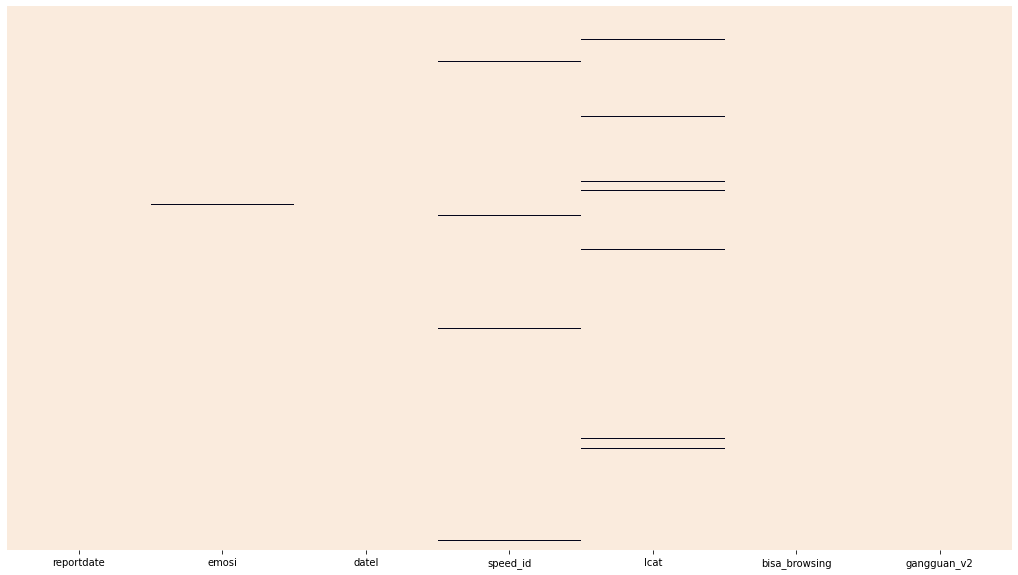

In [29]:
plot_null_matrix(eda)

In [30]:
eda['gangguan_v2'][eda['bisa_browsing']==1].value_counts()

Lambat                            138435
Intermitten / Putus-Putus          41885
Tidak Bisa ke Website Tertentu      3350
Gangguan Game Online                1802
Gangguan IP Publik                   743
Tidak Bisa Email                     272
Push Advertising                      68
                                       2
Name: gangguan_v2, dtype: int64

In [31]:
df['gangguan'].value_counts()

Tidak Bisa Browsing - Tidak Bisa Koneksi                974679
Tidak Bisa Browsing - 2P / 3P Mati Total                780570
Bisa Browsing - Lambat                                  667520
Bisa Browsing - Intermitten / Putus-Putus               160373
Bisa Browsing (FISIK) - Lambat                           44308
Bisa Browsing (FISIK) - Intermitten / Putus-Putus        21423
Bisa Browsing - Gangguan Game Online                     17322
Bisa Browsing - Tidak Bisa ke Website Tertentu           17040
Bisa Browsing - Gangguan IP Publik                        3720
Bisa Browsing - Tidak Bisa Email                           844
Bisa Browsing - Push Advertising                           370
Berhasil login, tetapi tidak bisa browsing                 301
Tidak Bisa Browsing                                        210
Tidak Bisa Browsing - Gangguan Pasca PSB < 30Hr             59
Bisa Browsing                                               15
Tidak bisa browsing                                    

In [32]:
mask_bool_gangguan = ~eda['gangguan_v2'].str.lower().str.contains(r'[a-z]')

In [33]:
eda['gangguan_v2'] = eda['gangguan_v2'].mask(mask_bool_gangguan, np.nan)

In [34]:
eda['gangguan_v2'].value_counts(dropna=False)

Lambat                            138435
Tidak Bisa Koneksi                130018
2P / 3P Mati Total                115538
Intermitten / Putus-Putus          41885
Tidak Bisa ke Website Tertentu      3350
Gangguan Game Online                1802
Gangguan IP Publik                   743
Tidak Bisa Email                     272
Push Advertising                      68
NaN                                   39
Gangguan Pasca PSB < 30Hr              6
LOGIK                                  1
Name: gangguan_v2, dtype: int64

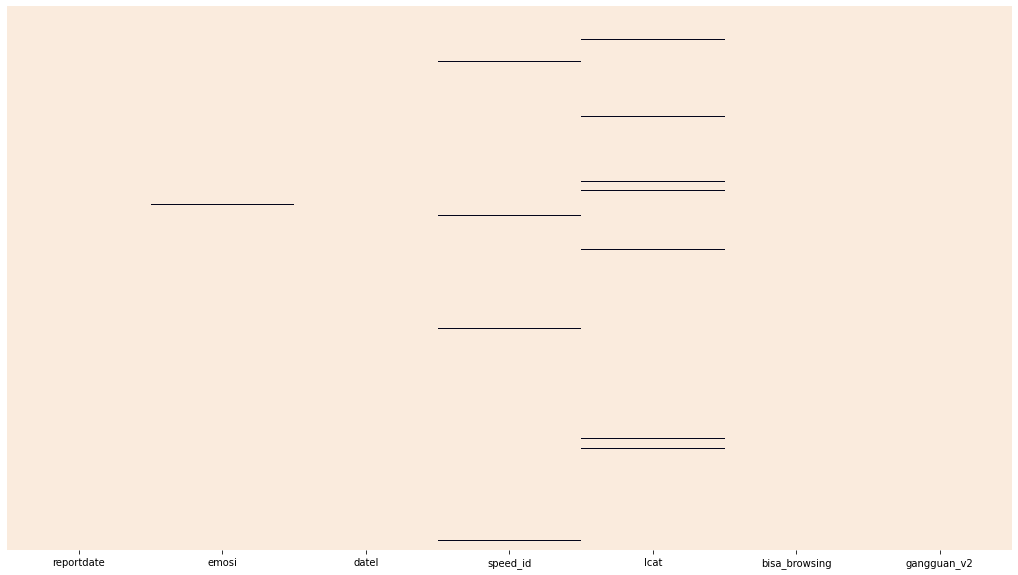

In [35]:
plot_null_matrix(eda)

In [36]:
eda.isnull().sum()

reportdate          0
emosi             624
datel               0
speed_id         4398
lcat             5267
bisa_browsing       0
gangguan_v2        39
dtype: int64

In [37]:
eda

,reportdate,emosi,datel,speed_id,lcat,bisa_browsing,gangguan_v2
6,2021-02-20 21:22:06,Ramah,JAKSEL,10M,Prime Cluster,0,Tidak Bisa Koneksi
10,2021-01-11 15:25:28,Marah,JAKSEL,NaN,Prime Cluster,1,Intermitten / Putus-Putus
14,2021-03-06 10:06:42,Ramah,JAKUT,20M,Residensial,0,2P / 3P Mati Total
16,2021-06-01 20:36:59,Ramah,JAKPUS,40M,Prime Cluster,1,Lambat
47,2021-01-07 20:37:35,Ramah,JAKTIM,20M,Prime Cluster,0,2P / 3P Mati Total
...,...,...,...,...,...,...,...
2688726,2021-02-24 19:50:36,Ramah,JAKSEL,50M,Residensial,0,Tidak Bisa Koneksi
2688727,2021-06-19 19:15:12,Ramah,JAKTIM,50M,Residensial,0,2P / 3P Mati Total
2688739,2021-06-13 21:30:09,Ramah,JAKSEL,10M,Residensial,0,2P / 3P Mati Total
2688745,2021-04-28 11:51:13,Ramah,JAKSEL,20M,Prime Cluster,1,Lambat


In [38]:
eda.isnull().sum().sum()

10328

## July 27 2021

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
import warnings
warnings.filterwarnings('ignore')

In [81]:
start_time = time.time()
df = pd.read_feather('D:/big-datasets/internship-telkom/tiket_internet_Jan_June_2021.ftr')
print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 7.077491283416748


In [82]:
df['reportdate'] = pd.to_datetime(df['reportdate'])

In [83]:
eda = df[['reportdate', 'gangguan', 'emosi', 'datel', 'speed_id', 'lcat']]

In [84]:
eda['bisa_browsing'] = np.nan
eda['gangguan_v2'] = np.nan

In [85]:
eda['gangguan'][eda['gangguan'].str.contains(r'(?<!Tidak\s)\bBisa Browsing\b')].value_counts()

Bisa Browsing - Lambat                               667520
Bisa Browsing - Intermitten / Putus-Putus            160373
Bisa Browsing (FISIK) - Lambat                        44308
Bisa Browsing (FISIK) - Intermitten / Putus-Putus     21423
Bisa Browsing - Gangguan Game Online                  17322
Bisa Browsing - Tidak Bisa ke Website Tertentu        17040
Bisa Browsing - Gangguan IP Publik                     3720
Bisa Browsing - Tidak Bisa Email                        844
Bisa Browsing - Push Advertising                        370
Bisa Browsing                                            15
Name: gangguan, dtype: int64

In [86]:
eda['bisa_browsing'] = eda['bisa_browsing'].mask(mask_bool, 1)
eda['bisa_browsing'] = eda['bisa_browsing'].mask(eda['bisa_browsing'].isnull(), 0)

In [87]:
eda['bisa_browsing'] = eda['bisa_browsing'].astype(int)

In [88]:
eda

,reportdate,gangguan,emosi,datel,speed_id,lcat,bisa_browsing,gangguan_v2
0,2021-06-19 12:30:31,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,NUNUKAN,3M,Residensial,0,NaN
1,2021-05-24 14:32:10,Tidak Bisa Browsing - Tidak Bisa Koneksi,Ramah,BALIKPAPAN,10M,Prime Cluster,0,NaN
2,2021-04-04 11:27:17,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,JAMBI,10M,Residensial,0,NaN
3,2021-06-26 21:09:49,Bisa Browsing - Lambat,Ramah,KUJANG,20M,Prime Cluster,0,NaN
4,2021-06-15 11:02:32,Bisa Browsing - Lambat,Marah,BLITAR,20M,Residensial,0,NaN
...,...,...,...,...,...,...,...,...
2688758,2021-01-04 12:21:16,Tidak Bisa Browsing - 2P / 3P Mati Total,Marah,SUMEDANG,20M,Prime Cluster,0,NaN
2688759,2021-02-18 09:56:08,Bisa Browsing - Lambat,Agak marah,NGANJUK,10M,Residensial,0,NaN
2688760,2021-05-29 08:31:46,Tidak Bisa Browsing - 2P / 3P Mati Total,Ramah,GARUT,20M,Residensial,0,NaN
2688761,2021-05-04 08:22:38,Bisa Browsing - Lambat,Marah,SURABAYA SELATAN,30M,Residensial,0,NaN


In [89]:
eda['gangguan'].value_counts()

Tidak Bisa Browsing - Tidak Bisa Koneksi                974679
Tidak Bisa Browsing - 2P / 3P Mati Total                780570
Bisa Browsing - Lambat                                  667520
Bisa Browsing - Intermitten / Putus-Putus               160373
Bisa Browsing (FISIK) - Lambat                           44308
Bisa Browsing (FISIK) - Intermitten / Putus-Putus        21423
Bisa Browsing - Gangguan Game Online                     17322
Bisa Browsing - Tidak Bisa ke Website Tertentu           17040
Bisa Browsing - Gangguan IP Publik                        3720
Bisa Browsing - Tidak Bisa Email                           844
Bisa Browsing - Push Advertising                           370
Berhasil login, tetapi tidak bisa browsing                 301
Tidak Bisa Browsing                                        210
Tidak Bisa Browsing - Gangguan Pasca PSB < 30Hr             59
Bisa Browsing                                               15
Tidak bisa browsing                                    

In [90]:
eda[eda['gangguan'] == 'Pelanggan berhasil login, tetapi tidak bisa browsing']

,reportdate,gangguan,emosi,datel,speed_id,lcat,bisa_browsing,gangguan_v2
413545,2021-01-17 07:02:28,"Pelanggan berhasil login, tetapi tidak bisa br...",Marah,JAKTIM,,Residensial,1,NaN


In [91]:
eda[eda['gangguan'].str.contains('tetapi tidak bisa browsing')]

,reportdate,gangguan,emosi,datel,speed_id,lcat,bisa_browsing,gangguan_v2
7989,2021-06-11 13:10:37,"Berhasil login, tetapi tidak bisa browsing",Marah,SUMSEL,10M,Residensial,1,NaN
8436,2021-03-25 13:22:31,"Berhasil login, tetapi tidak bisa browsing",Marah,SUMSEL,100M,Bisnis,1,NaN
11167,2021-06-14 10:38:27,"Berhasil login, tetapi tidak bisa browsing",Marah,SUMSEL,20M,Residensial,1,NaN
20386,2021-02-05 15:20:03,"Berhasil login, tetapi tidak bisa browsing",Ramah,SUMEDANG,,Prime Cluster,1,NaN
23634,2021-03-17 13:25:57,"Berhasil login, tetapi tidak bisa browsing",Marah,SUMSEL,20M,Prime Cluster,1,NaN
...,...,...,...,...,...,...,...,...
2659746,2021-06-10 11:42:58,"Berhasil login, tetapi tidak bisa browsing",Marah,SUMSEL,20M,Residensial,1,NaN
2665586,2021-05-20 11:37:09,"Berhasil login, tetapi tidak bisa browsing",Marah,SUMSEL,20M,Apartment,1,NaN
2666041,2021-03-10 10:53:17,"Berhasil login, tetapi tidak bisa browsing",Marah,SUMSEL,20M,Dinastel Rumah,1,NaN
2668256,2021-04-12 11:55:54,"Berhasil login, tetapi tidak bisa browsing",Marah,SUMSEL,10M,Prime Cluster,1,NaN


In [92]:
df

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
0,2021-06-19 12:30:31,2021-06-19 15:54:44,IN101933857,Tidak Bisa Browsing - 2P / 3P Mati Total,[/ardiansyah/] 2/3P mati total [A_INTERNET][DCS],0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,NUNUKAN,47,6,INETR3M3,3M,Residensial,5.0
1,2021-05-24 14:32:10,None,IN99840378,Tidak Bisa Browsing - Tidak Bisa Koneksi,[/Arlianasari/] Tidak bisa browsing [A_INTERNE...,1,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,BALIKPAPAN,45,6,INETF10M,10M,Prime Cluster,28.0
2,2021-04-04 11:27:17,2021-04-04 17:55:49,IN94701817,Tidak Bisa Browsing - 2P / 3P Mati Total,[/atok/] 2/3P mati total [A_INTERNET][DCS],0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,JAMBI,6,1,INETF10M,10M,Residensial,18.0
3,2021-06-26 21:09:49,None,IN102601892,Bisa Browsing - Lambat,[/CAHYONO/] T1 / / COM / cahyono / / inet lam...,0,,,Ramah,KUJANG,19,2,INETF20M,20M,Prime Cluster,109.0
4,2021-06-15 11:02:32,None,IN101590273,Bisa Browsing - Lambat,[/bapak yudha/] T1 / / COM / bapak yudha / / ...,0,,,Marah,BLITAR,35,5,INETF20M,20M,Residensial,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688758,2021-01-04 12:21:16,2021-01-04 13:33:37,IN86509911,Tidak Bisa Browsing - 2P / 3P Mati Total,[MANJA JAM 14] RIDWAN [/Abdullah Irsyad Ikramu...,0,Perbaikan FIBER,MODEM/ONT KENA PETIR/MATI/RUSAK,Marah,SUMEDANG,23,3,INETF20M,20M,Prime Cluster,22.0
2688759,2021-02-18 09:56:08,None,IN90993907,Bisa Browsing - Lambat,[/Ibu Sri /] T1 / / COM / Ibu Sri / / Inet l...,0,,,Agak marah,NGANJUK,35,5,INETF10M,10M,Residensial,22.0
2688760,2021-05-29 08:31:46,2021-05-29 11:13:19,IN100233895,Tidak Bisa Browsing - 2P / 3P Mati Total,<b>[TTR3JAM-EXPJAM16.00]</b>KDN.YUDI.LOS[/bp o...,0,Perbaikan FIBER,MODEM/ONT KENA PETIR/MATI/RUSAK,Ramah,GARUT,24,3,INETF20M,20M,Residensial,44.0
2688761,2021-05-04 08:22:38,None,IN98504677,Bisa Browsing - Lambat,[/DIMAS SURYA PRATA/] / sosmed / @mumetngodin...,0,,,Marah,SURABAYA SELATAN,38,5,INETF30M,30M,Residensial,25.0


In [93]:
df['solution'].value_counts()

MODEM/ONT KENA PETIR/MATI/RUSAK                 1099138
                                                 933684
KABEL/KONEKTOR RJ11 RUSAK                        490169
INTERNET - CPE                                    25539
SETTING ULANG MODEM/ONT                           22005
                                                 ...   
TRUNK LOGIC                                           1
Non Numbering SUMUT TIMUR (PEMATANG SIANTAR)          1
CATU DAYA MSAN                                        1
PATCH CORD ODF                                        1
LINK ISP                                              1
Name: solution, Length: 232, dtype: int64

In [94]:
eda = df[['reportdate', 'gangguan', 'is_gamas', 'emosi', 'datel', 'cwitel', 'reg', 'speed_id', 'lcat']]

In [95]:
eda['bisa_browsing'] = np.nan
eda['gangguan_v2'] = np.nan

In [96]:
eda[eda['gangguan'].str.contains('tetapi tidak bisa browsing')]

,reportdate,gangguan,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
7989,2021-06-11 13:10:37,"Berhasil login, tetapi tidak bisa browsing",1,Marah,SUMSEL,9,1,10M,Residensial,NaN,NaN
8436,2021-03-25 13:22:31,"Berhasil login, tetapi tidak bisa browsing",0,Marah,SUMSEL,9,1,100M,Bisnis,NaN,NaN
11167,2021-06-14 10:38:27,"Berhasil login, tetapi tidak bisa browsing",0,Marah,SUMSEL,9,1,20M,Residensial,NaN,NaN
20386,2021-02-05 15:20:03,"Berhasil login, tetapi tidak bisa browsing",0,Ramah,SUMEDANG,23,3,,Prime Cluster,NaN,NaN
23634,2021-03-17 13:25:57,"Berhasil login, tetapi tidak bisa browsing",0,Marah,SUMSEL,9,1,20M,Prime Cluster,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2659746,2021-06-10 11:42:58,"Berhasil login, tetapi tidak bisa browsing",0,Marah,SUMSEL,9,1,20M,Residensial,NaN,NaN
2665586,2021-05-20 11:37:09,"Berhasil login, tetapi tidak bisa browsing",0,Marah,SUMSEL,9,1,20M,Apartment,NaN,NaN
2666041,2021-03-10 10:53:17,"Berhasil login, tetapi tidak bisa browsing",0,Marah,SUMSEL,9,1,20M,Dinastel Rumah,NaN,NaN
2668256,2021-04-12 11:55:54,"Berhasil login, tetapi tidak bisa browsing",0,Marah,SUMSEL,9,1,10M,Prime Cluster,NaN,NaN


In [97]:
eda['gangguan'][eda['gangguan'].str.contains('tetapi tidak bisa browsing')].value_counts()

Berhasil login, tetapi tidak bisa browsing              301
Pelanggan berhasil login, tetapi tidak bisa browsing      1
Name: gangguan, dtype: int64

In [98]:
mask_bool = eda['gangguan'].str.contains('tetapi tidak bisa browsing')

In [99]:
eda['gangguan'].value_counts()

Tidak Bisa Browsing - Tidak Bisa Koneksi                974679
Tidak Bisa Browsing - 2P / 3P Mati Total                780570
Bisa Browsing - Lambat                                  667520
Bisa Browsing - Intermitten / Putus-Putus               160373
Bisa Browsing (FISIK) - Lambat                           44308
Bisa Browsing (FISIK) - Intermitten / Putus-Putus        21423
Bisa Browsing - Gangguan Game Online                     17322
Bisa Browsing - Tidak Bisa ke Website Tertentu           17040
Bisa Browsing - Gangguan IP Publik                        3720
Bisa Browsing - Tidak Bisa Email                           844
Bisa Browsing - Push Advertising                           370
Berhasil login, tetapi tidak bisa browsing                 301
Tidak Bisa Browsing                                        210
Tidak Bisa Browsing - Gangguan Pasca PSB < 30Hr             59
Bisa Browsing                                               15
Tidak bisa browsing                                    

In [100]:
eda['gangguan'] = eda['gangguan'].mask(mask_bool, 'Tidak Bisa Browsing - Tetapi Berhasil Login')

In [101]:
eda['gangguan'][eda['gangguan'].str.contains('tetapi tidak bisa browsing')].value_counts()

Series([], Name: gangguan, dtype: int64)

In [102]:
eda['gangguan'].value_counts()

Tidak Bisa Browsing - Tidak Bisa Koneksi             974679
Tidak Bisa Browsing - 2P / 3P Mati Total             780570
Bisa Browsing - Lambat                               667520
Bisa Browsing - Intermitten / Putus-Putus            160373
Bisa Browsing (FISIK) - Lambat                        44308
Bisa Browsing (FISIK) - Intermitten / Putus-Putus     21423
Bisa Browsing - Gangguan Game Online                  17322
Bisa Browsing - Tidak Bisa ke Website Tertentu        17040
Bisa Browsing - Gangguan IP Publik                     3720
Bisa Browsing - Tidak Bisa Email                        844
Bisa Browsing - Push Advertising                        370
Tidak Bisa Browsing - Tetapi Berhasil Login             302
Tidak Bisa Browsing                                     210
Tidak Bisa Browsing - Gangguan Pasca PSB < 30Hr          59
Bisa Browsing                                            15
Tidak bisa browsing                                       4
Tidak Bisa Browsing - LOGIK             

In [103]:
eda

,reportdate,gangguan,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
0,2021-06-19 12:30:31,Tidak Bisa Browsing - 2P / 3P Mati Total,0,Ramah,NUNUKAN,47,6,3M,Residensial,NaN,NaN
1,2021-05-24 14:32:10,Tidak Bisa Browsing - Tidak Bisa Koneksi,1,Ramah,BALIKPAPAN,45,6,10M,Prime Cluster,NaN,NaN
2,2021-04-04 11:27:17,Tidak Bisa Browsing - 2P / 3P Mati Total,0,Ramah,JAMBI,6,1,10M,Residensial,NaN,NaN
3,2021-06-26 21:09:49,Bisa Browsing - Lambat,0,Ramah,KUJANG,19,2,20M,Prime Cluster,NaN,NaN
4,2021-06-15 11:02:32,Bisa Browsing - Lambat,0,Marah,BLITAR,35,5,20M,Residensial,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2688758,2021-01-04 12:21:16,Tidak Bisa Browsing - 2P / 3P Mati Total,0,Marah,SUMEDANG,23,3,20M,Prime Cluster,NaN,NaN
2688759,2021-02-18 09:56:08,Bisa Browsing - Lambat,0,Agak marah,NGANJUK,35,5,10M,Residensial,NaN,NaN
2688760,2021-05-29 08:31:46,Tidak Bisa Browsing - 2P / 3P Mati Total,0,Ramah,GARUT,24,3,20M,Residensial,NaN,NaN
2688761,2021-05-04 08:22:38,Bisa Browsing - Lambat,0,Marah,SURABAYA SELATAN,38,5,30M,Residensial,NaN,NaN


In [104]:
mask_bool = eda['gangguan'].str.contains(r'(?<!Tidak\s)\bBisa Browsing\b')

In [105]:
eda['bisa_browsing'] = eda['bisa_browsing'].mask(mask_bool, 1)
eda['bisa_browsing'] = eda['bisa_browsing'].mask(eda['bisa_browsing'].isnull(), 0)

In [106]:
eda['bisa_browsing'] = eda['bisa_browsing'].astype(int)

In [109]:
eda['bisa_browsing'].value_counts(dropna=False)

0    1755828
1     932935
Name: bisa_browsing, dtype: int64

In [108]:
974679 + 780570 + 302 + 210 + 59 + 4 + 3 + 1

1755828

In [113]:
eda['gangguan'][eda['bisa_browsing'] == 1].str.replace(r'\s\(FISIK\)', '').str[16:].value_counts()

Lambat                            711828
Intermitten / Putus-Putus         181796
Gangguan Game Online               17322
Tidak Bisa ke Website Tertentu     17040
Gangguan IP Publik                  3720
Tidak Bisa Email                     844
Push Advertising                     370
                                      15
Name: gangguan, dtype: int64

In [116]:
eda['gangguan'][eda['bisa_browsing'] == 0].str[22:].value_counts()

Tidak Bisa Koneksi            974679
2P / 3P Mati Total            780570
Tetapi Berhasil Login            302
                                 214
Gangguan Pasca PSB < 30Hr         59
LOGIK                              3
CPE Petugas Diminta Datang         1
Name: gangguan, dtype: int64

In [117]:
replace_gangguan_1 = eda['gangguan'][eda['bisa_browsing'] == 1].str.replace(r'\s\(FISIK\)', '').str[16:]
replace_gangguan_0 = eda['gangguan'][eda['bisa_browsing'] == 0].str[22:]

In [118]:
eda['gangguan_v2'] = eda['gangguan_v2'].mask(eda['bisa_browsing']==1, replace_gangguan_1)
eda['gangguan_v2'] = eda['gangguan_v2'].mask(eda['bisa_browsing']==0, replace_gangguan_0)

In [121]:
eda

,reportdate,gangguan,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
0,2021-06-19 12:30:31,Tidak Bisa Browsing - 2P / 3P Mati Total,0,Ramah,NUNUKAN,47,6,3M,Residensial,0,2P / 3P Mati Total
1,2021-05-24 14:32:10,Tidak Bisa Browsing - Tidak Bisa Koneksi,1,Ramah,BALIKPAPAN,45,6,10M,Prime Cluster,0,Tidak Bisa Koneksi
2,2021-04-04 11:27:17,Tidak Bisa Browsing - 2P / 3P Mati Total,0,Ramah,JAMBI,6,1,10M,Residensial,0,2P / 3P Mati Total
3,2021-06-26 21:09:49,Bisa Browsing - Lambat,0,Ramah,KUJANG,19,2,20M,Prime Cluster,1,Lambat
4,2021-06-15 11:02:32,Bisa Browsing - Lambat,0,Marah,BLITAR,35,5,20M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...,...
2688758,2021-01-04 12:21:16,Tidak Bisa Browsing - 2P / 3P Mati Total,0,Marah,SUMEDANG,23,3,20M,Prime Cluster,0,2P / 3P Mati Total
2688759,2021-02-18 09:56:08,Bisa Browsing - Lambat,0,Agak marah,NGANJUK,35,5,10M,Residensial,1,Lambat
2688760,2021-05-29 08:31:46,Tidak Bisa Browsing - 2P / 3P Mati Total,0,Ramah,GARUT,24,3,20M,Residensial,0,2P / 3P Mati Total
2688761,2021-05-04 08:22:38,Bisa Browsing - Lambat,0,Marah,SURABAYA SELATAN,38,5,30M,Residensial,1,Lambat


In [122]:
eda['gangguan_v2'].value_counts()

Tidak Bisa Koneksi                974679
2P / 3P Mati Total                780570
Lambat                            711828
Intermitten / Putus-Putus         181796
Gangguan Game Online               17322
Tidak Bisa ke Website Tertentu     17040
Gangguan IP Publik                  3720
Tidak Bisa Email                     844
Push Advertising                     370
Tetapi Berhasil Login                302
                                     229
Gangguan Pasca PSB < 30Hr             59
LOGIK                                  3
CPE Petugas Diminta Datang             1
Name: gangguan_v2, dtype: int64

In [125]:
eda = eda.drop('gangguan', axis=1)

In [126]:
eda

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
0,2021-06-19 12:30:31,0,Ramah,NUNUKAN,47,6,3M,Residensial,0,2P / 3P Mati Total
1,2021-05-24 14:32:10,1,Ramah,BALIKPAPAN,45,6,10M,Prime Cluster,0,Tidak Bisa Koneksi
2,2021-04-04 11:27:17,0,Ramah,JAMBI,6,1,10M,Residensial,0,2P / 3P Mati Total
3,2021-06-26 21:09:49,0,Ramah,KUJANG,19,2,20M,Prime Cluster,1,Lambat
4,2021-06-15 11:02:32,0,Marah,BLITAR,35,5,20M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...
2688758,2021-01-04 12:21:16,0,Marah,SUMEDANG,23,3,20M,Prime Cluster,0,2P / 3P Mati Total
2688759,2021-02-18 09:56:08,0,Agak marah,NGANJUK,35,5,10M,Residensial,1,Lambat
2688760,2021-05-29 08:31:46,0,Ramah,GARUT,24,3,20M,Residensial,0,2P / 3P Mati Total
2688761,2021-05-04 08:22:38,0,Marah,SURABAYA SELATAN,38,5,30M,Residensial,1,Lambat


In [134]:
eda[~eda['emosi'].str.lower().str.contains(r'.')]

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
944,2021-04-15 21:17:47,0,,KUJANG,19,2,10M,Bisnis,0,Tidak Bisa Koneksi
4253,2021-04-16 08:09:52,0,,JAKTIM,16,2,20M,Bisnis,0,Tidak Bisa Koneksi
6268,2021-06-15 17:05:20,0,,RIDAR,5,1,20M,Bisnis,0,Tidak Bisa Koneksi
6320,2021-04-17 14:30:39,0,,JAMBI,6,1,10M,Bisnis,0,Tidak Bisa Koneksi
6610,2021-02-27 15:28:04,0,,JAKSEL,13,2,20M,Residensial,0,2P / 3P Mati Total
...,...,...,...,...,...,...,...,...,...,...
2685306,2021-06-14 10:04:42,0,,SUMBAR,4,1,10M,Pemerintahan/TNI/POLRI,0,Tidak Bisa Koneksi
2685346,2021-03-20 13:34:49,0,,BANTEN,17,2,10M,Residensial,0,Tidak Bisa Koneksi
2685685,2021-01-02 15:15:35,0,,JAKTIM,16,2,20M,Residensial,1,Lambat
2686005,2021-02-26 18:16:41,0,,BALIKPAPAN,45,6,20M,Residensial,0,Tidak Bisa Koneksi


In [136]:
eda['emosi'].value_counts()

Ramah         1745302
Marah          689486
Agak marah     250058
                 3917
Name: emosi, dtype: int64

In [135]:
eda[~eda['datel'].str.lower().str.contains(r'.')]

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
20650,2021-01-11 17:00:15,0,Marah,,,,,,0,Tidak Bisa Koneksi
393027,2021-05-16 00:50:04,1,Ramah,,,,20M,Prime Cluster,0,Tidak Bisa Koneksi
486246,2021-04-09 17:35:25,0,Ramah,,,,20M,Prime Cluster,1,Intermitten / Putus-Putus
659050,2021-05-24 16:00:28,0,Marah,,,,1M,Prime Cluster,0,2P / 3P Mati Total
1166388,2021-05-06 21:37:09,0,Marah,,,,20M,Prime Cluster,0,Tidak Bisa Koneksi
1339550,2021-05-16 01:50:17,1,Marah,,,,20M,Prime Cluster,0,Tidak Bisa Koneksi
1550024,2021-05-06 21:00:35,0,Ramah,,,,20M,Residensial,0,Tidak Bisa Koneksi
1593427,2021-06-23 17:03:08,0,Ramah,,,,,Prime Cluster,1,Lambat
1608088,2021-04-17 11:44:05,0,Marah,,,,20M,Residensial,1,Lambat
1720388,2021-04-17 11:56:33,0,Ramah,,,,20M,Residensial,0,2P / 3P Mati Total


In [137]:
eda[~eda['speed_id'].str.lower().str.contains(r'.')]

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
10,2021-01-11 15:25:28,0,Marah,JAKSEL,13,2,,Prime Cluster,1,Intermitten / Putus-Putus
108,2021-01-30 10:35:40,1,Marah,DEPOK,19,2,,Residensial,0,2P / 3P Mati Total
317,2021-02-11 17:15:44,0,Marah,LENGKONG,18,2,,Prime Cluster,0,2P / 3P Mati Total
489,2021-04-06 08:27:43,0,Ramah,JAKBAR,12,2,,Residensial,1,Lambat
508,2021-02-09 09:05:47,0,Ramah,JAKTIM,16,2,,Bisnis,0,Tidak Bisa Koneksi
...,...,...,...,...,...,...,...,...,...,...
2688399,2021-02-18 11:51:43,0,Marah,GRESIK,39,5,,Residensial,1,Lambat
2688418,2021-03-24 07:22:12,0,Ramah,BIMA,56,5,,Pemerintahan/TNI/POLRI,0,2P / 3P Mati Total
2688487,2021-04-09 14:45:35,0,Ramah,RIDAR,5,1,,Residensial,1,Lambat
2688505,2021-01-15 08:29:13,0,Ramah,KLATEN,30,4,,Residensial,0,Tidak Bisa Koneksi


In [138]:
eda['speed_id'].value_counts()

20M     1470974
10M      637301
30M      216328
50M      163747
40M       66722
100M      44642
1M        31348
          19080
3M        12747
2M        11853
200M       4693
5M         3679
512K       3348
300M       1405
256K        896
Name: speed_id, dtype: int64

In [139]:
eda[~eda['lcat'].str.lower().str.contains(r'.')]

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
96,2021-01-10 14:47:34,0,Agak marah,SURABAYA UTARA,39,5,30M,,1,Lambat
137,2021-04-21 15:36:02,0,Ramah,JAKUT,15,2,20M,,0,2P / 3P Mati Total
138,2021-01-23 09:02:32,0,Ramah,TANAHGROGOT,45,6,20M,,0,2P / 3P Mati Total
177,2021-05-21 19:22:31,0,Ramah,PASAR BARU,18,2,20M,,0,2P / 3P Mati Total
399,2021-06-21 16:45:06,0,Ramah,MANOKWARI,60,7,20M,,0,2P / 3P Mati Total
...,...,...,...,...,...,...,...,...,...,...
2688542,2021-04-09 07:21:24,0,Ramah,SAMARINDA,46,6,30M,,0,Tidak Bisa Koneksi
2688586,2021-02-01 09:00:29,0,Ramah,GOWA,52,7,100M,,0,Tidak Bisa Koneksi
2688664,2021-02-15 17:08:18,0,Marah,MAKASSAR,52,7,20M,,0,2P / 3P Mati Total
2688677,2021-03-20 08:19:46,0,Ramah,TARAKAN,47,6,20M,,0,2P / 3P Mati Total


In [141]:
eda['is_gamas'].value_counts()

0    2291251
1     397512
Name: is_gamas, dtype: int64

In [144]:
cols = ['emosi', 'datel', 'cwitel', 'reg', 'speed_id', 'lcat']

for col in cols:
    mask_bool = ~eda[col].str.lower().str.contains(r'.')
    eda[col] = eda[col].mask(mask_bool, np.nan)

In [145]:
eda['emosi'].value_counts(dropna=False)

Ramah         1745302
Marah          689486
Agak marah     250058
NaN              3917
Name: emosi, dtype: int64

In [146]:
eda.isnull().sum()

reportdate           0
is_gamas             0
emosi             3917
datel               12
cwitel              16
reg                 16
speed_id         19080
lcat             34506
bisa_browsing        0
gangguan_v2          0
dtype: int64

In [147]:
def plot_null_matrix(df, figsize=(18, 10)):
    plt.figure(figsize=figsize)
    df_null = df.isnull()
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.show()

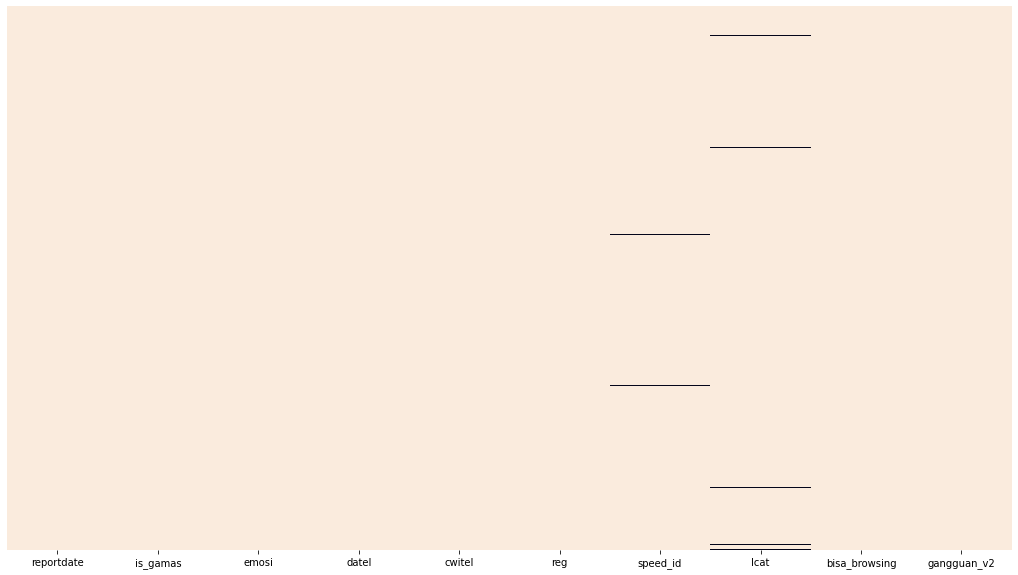

In [148]:
plot_null_matrix(eda)

In [168]:
eda.shape

(2688763, 10)

In [159]:
34506 / 2688763

0.012833410754313416

In [153]:
eda['datel'] = eda['datel'].str.lower().str.capitalize()

In [161]:
eda['is_gamas'] = eda['is_gamas'].astype(int)

In [162]:
eda_no_missing = eda.copy()

In [165]:
eda_no_missing = eda_no_missing.dropna()

In [167]:
eda_no_missing.shape

(2632501, 10)

In [169]:
eda

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
0,2021-06-19 12:30:31,0,Ramah,Nunukan,47,6,3M,Residensial,0,2P / 3P Mati Total
1,2021-05-24 14:32:10,1,Ramah,Balikpapan,45,6,10M,Prime Cluster,0,Tidak Bisa Koneksi
2,2021-04-04 11:27:17,0,Ramah,Jambi,6,1,10M,Residensial,0,2P / 3P Mati Total
3,2021-06-26 21:09:49,0,Ramah,Kujang,19,2,20M,Prime Cluster,1,Lambat
4,2021-06-15 11:02:32,0,Marah,Blitar,35,5,20M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...
2688758,2021-01-04 12:21:16,0,Marah,Sumedang,23,3,20M,Prime Cluster,0,2P / 3P Mati Total
2688759,2021-02-18 09:56:08,0,Agak marah,Nganjuk,35,5,10M,Residensial,1,Lambat
2688760,2021-05-29 08:31:46,0,Ramah,Garut,24,3,20M,Residensial,0,2P / 3P Mati Total
2688761,2021-05-04 08:22:38,0,Marah,Surabaya selatan,38,5,30M,Residensial,1,Lambat


In [181]:
eda.to_feather('D:/big-datasets/internship-telkom/eda-tiket.ftr')

In [182]:
load = pd.read_feather('D:/big-datasets/internship-telkom/eda-tiket.ftr')
load

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
0,2021-06-19 12:30:31,0,Ramah,Nunukan,47,6,3M,Residensial,0,2P / 3P Mati Total
1,2021-05-24 14:32:10,1,Ramah,Balikpapan,45,6,10M,Prime Cluster,0,Tidak Bisa Koneksi
2,2021-04-04 11:27:17,0,Ramah,Jambi,6,1,10M,Residensial,0,2P / 3P Mati Total
3,2021-06-26 21:09:49,0,Ramah,Kujang,19,2,20M,Prime Cluster,1,Lambat
4,2021-06-15 11:02:32,0,Marah,Blitar,35,5,20M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...
2688758,2021-01-04 12:21:16,0,Marah,Sumedang,23,3,20M,Prime Cluster,0,2P / 3P Mati Total
2688759,2021-02-18 09:56:08,0,Agak marah,Nganjuk,35,5,10M,Residensial,1,Lambat
2688760,2021-05-29 08:31:46,0,Ramah,Garut,24,3,20M,Residensial,0,2P / 3P Mati Total
2688761,2021-05-04 08:22:38,0,Marah,Surabaya selatan,38,5,30M,Residensial,1,Lambat


In [187]:
eda_no_missing = eda_no_missing.reset_index(drop=True)

In [188]:
eda_no_missing.to_feather('D:/big-datasets/internship-telkom/eda-tiket-no-missing.ftr')

In [189]:
load = pd.read_feather('D:/big-datasets/internship-telkom/eda-tiket-no-missing.ftr')
load

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
0,2021-06-19 12:30:31,0,Ramah,Nunukan,47,6,3M,Residensial,0,2P / 3P Mati Total
1,2021-05-24 14:32:10,1,Ramah,Balikpapan,45,6,10M,Prime Cluster,0,Tidak Bisa Koneksi
2,2021-04-04 11:27:17,0,Ramah,Jambi,6,1,10M,Residensial,0,2P / 3P Mati Total
3,2021-06-26 21:09:49,0,Ramah,Kujang,19,2,20M,Prime Cluster,1,Lambat
4,2021-06-15 11:02:32,0,Marah,Blitar,35,5,20M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...
2632496,2021-01-04 12:21:16,0,Marah,Sumedang,23,3,20M,Prime Cluster,0,2P / 3P Mati Total
2632497,2021-02-18 09:56:08,0,Agak marah,Nganjuk,35,5,10M,Residensial,1,Lambat
2632498,2021-05-29 08:31:46,0,Ramah,Garut,24,3,20M,Residensial,0,2P / 3P Mati Total
2632499,2021-05-04 08:22:38,0,Marah,Surabaya selatan,38,5,30M,Residensial,1,Lambat


# -----
### Checkpoint
# -----

In [3]:
df = pd.read_feather('D:/big-datasets/internship-telkom/eda-tiket-no-missing.ftr')

In [198]:
df

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
0,2021-06-19 12:30:31,0,Ramah,Nunukan,47,6,3M,Residensial,0,2P / 3P Mati Total
1,2021-05-24 14:32:10,1,Ramah,Balikpapan,45,6,10M,Prime Cluster,0,Tidak Bisa Koneksi
2,2021-04-04 11:27:17,0,Ramah,Jambi,6,1,10M,Residensial,0,2P / 3P Mati Total
3,2021-06-26 21:09:49,0,Ramah,Kujang,19,2,20M,Prime Cluster,1,Lambat
4,2021-06-15 11:02:32,0,Marah,Blitar,35,5,20M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...
2632496,2021-01-04 12:21:16,0,Marah,Sumedang,23,3,20M,Prime Cluster,0,2P / 3P Mati Total
2632497,2021-02-18 09:56:08,0,Agak marah,Nganjuk,35,5,10M,Residensial,1,Lambat
2632498,2021-05-29 08:31:46,0,Ramah,Garut,24,3,20M,Residensial,0,2P / 3P Mati Total
2632499,2021-05-04 08:22:38,0,Marah,Surabaya selatan,38,5,30M,Residensial,1,Lambat


In [199]:
df.isnull().sum()

reportdate       0
is_gamas         0
emosi            0
datel            0
cwitel           0
reg              0
speed_id         0
lcat             0
bisa_browsing    0
gangguan_v2      0
dtype: int64

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632501 entries, 0 to 2632500
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   reportdate     datetime64[ns]
 1   is_gamas       int32         
 2   emosi          object        
 3   datel          object        
 4   cwitel         object        
 5   reg            object        
 6   speed_id       object        
 7   lcat           object        
 8   bisa_browsing  int32         
 9   gangguan_v2    object        
dtypes: datetime64[ns](1), int32(2), object(7)
memory usage: 180.8+ MB


In [201]:
df['emosi'].value_counts()

Ramah         1710429
Marah          677085
Agak marah     244987
Name: emosi, dtype: int64

In [203]:
df['emosi'].value_counts(normalize=True)

Ramah         0.649735
Marah         0.257202
Agak marah    0.093062
Name: emosi, dtype: float64

In [202]:
df['emosi'][df['reportdate'].dt.hour == 0].value_counts()

Ramah         17039
Marah          9617
Agak marah     1402
Name: emosi, dtype: int64

In [4]:
mask_bool = df['emosi'] == 'Agak marah'

In [5]:
df['emosi'] = df['emosi'].mask(mask_bool, 'Marah')

In [208]:
df['emosi'].value_counts()

Ramah    1710429
Marah     922072
Name: emosi, dtype: int64

In [213]:
len(df[(df['emosi'] == 'Marah') & (df['reportdate'].dt.hour == 0)])

11019

In [216]:
df['reportdate'].dt.hour.value_counts().sort_index()

0      28058
1      18195
2      10557
3       9180
4      13075
5      26485
6      58448
7     113568
8     195044
9     222691
10    213128
11    197703
12    173666
13    180361
14    165708
15    154797
16    144001
17    135252
18    127436
19    125691
20    116205
21     95385
22     66433
23     41434
Name: reportdate, dtype: int64

In [6]:
hour_marah = {}

for i in range (0, 24):
    if i not in hour_marah:
        hour_marah[i] = len(df[(df['emosi'] == 'Marah') & (df['reportdate'].dt.hour == i)])
    else:
        hour_marah[i] += len(df[(df['emosi'] == 'Marah') & (df['reportdate'].dt.hour == i)])

In [218]:
hour_marah

{0: 11019,
 1: 6937,
 2: 3782,
 3: 3037,
 4: 4209,
 5: 8311,
 6: 18687,
 7: 37681,
 8: 64800,
 9: 77480,
 10: 74108,
 11: 69328,
 12: 61197,
 13: 63483,
 14: 57644,
 15: 52921,
 16: 49976,
 17: 47590,
 18: 45296,
 19: 45911,
 20: 42252,
 21: 35511,
 22: 24797,
 23: 16115}

In [223]:
max(hour_marah, key=hour_marah.get)

9

In [232]:
hour = pd.DataFrame(list(hour_marah.items()), columns = ['hour', 'marah_count'])
hour

,hour,marah_count
0,0,11019
1,1,6937
2,2,3782
3,3,3037
4,4,4209
5,5,8311
6,6,18687
7,7,37681
8,8,64800
9,9,77480


In [242]:
new_dict = {'1-6':hour['marah_count'].iloc[1:6].sum(),
            '7-9':hour['marah_count'].iloc[7:9].sum(),
            '10-12':hour['marah_count'].iloc[10:12].sum(),
            '13-15':hour['marah_count'].iloc[13:15].sum(),
            '16-18':hour['marah_count'].iloc[16:18].sum(),
            '19-21':hour['marah_count'].iloc[19:21].sum(),
            '22-24':24797+16115+11019}

In [243]:
new_dict

{'1-6': 26276,
 '7-9': 102481,
 '10-12': 143436,
 '13-15': 121127,
 '16-18': 97566,
 '19-21': 88163,
 '22-24': 51931}

In [248]:
df_plot = pd.DataFrame(list(new_dict.items()), columns = ['hour', 'marah_count'])
df_plot

,hour,marah_count
0,1-6,26276
1,7-9,102481
2,10-12,143436
3,13-15,121127
4,16-18,97566
5,19-21,88163
6,22-24,51931


In [331]:
plot = pd.DataFrame(list(hour_marah.items()), columns = ['hour', 'marah_count'])
plot

,hour,marah_count
0,0,11019
1,1,6937
2,2,3782
3,3,3037
4,4,4209
5,5,8311
6,6,18687
7,7,37681
8,8,64800
9,9,77480


## Storytelling plot

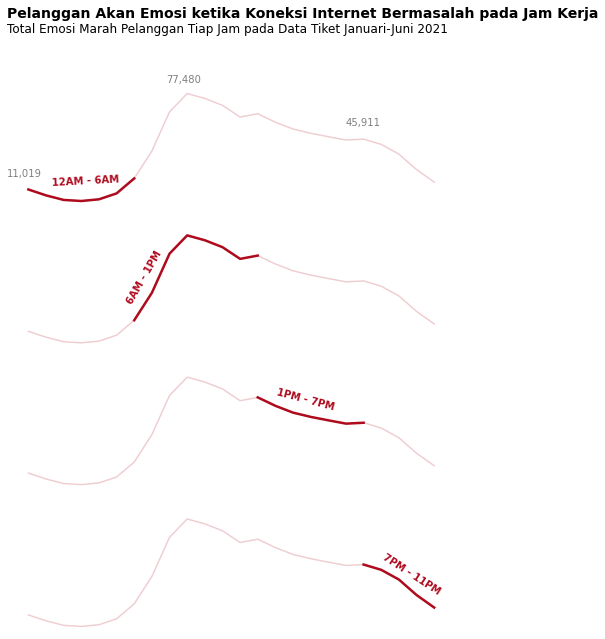

In [487]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8, 10))
for i in range(4):
    ax[i].plot(plot['hour'], plot['marah_count'], color='#af0b1e', alpha=0.2)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].tick_params(bottom=False, left=False)
    
    for loc in ['top', 'right', 'bottom', 'left']:
        ax[i].spines[loc].set_visible(False)


# Title
ax[0].text(x=-1.2, y=130000, s='Pelanggan Akan Emosi ketika Koneksi Internet Bermasalah pada Jam Kerja', size=14, weight='bold')
ax[0].text(x=-1.2, y=120000, s='Total Emosi Marah Pelanggan Tiap Jam pada Data Tiket Januari-Juni 2021', size=12)
        
# Highlight plot
ax[0].plot(plot['hour'][0:7], plot['marah_count'][0:7], color='#af0b1e', linewidth=2.5) # hour 0-6
ax[1].plot(plot['hour'][6:14], plot['marah_count'][6:14], color='#af0b1e', linewidth=2.5) # hour 7-13
ax[2].plot(plot['hour'][13:20], plot['marah_count'][13:20], color='#af0b1e', linewidth=2.5) # hour 13-19
ax[3].plot(plot['hour'][19:24], plot['marah_count'][19:24], color='#af0b1e', linewidth=2.5) # hour 19-23

# Y ticks
ax[0].text(x=-1.2, y=20000, s='11,019', alpha=0.5)
ax[0].text(x=7.8, y=85000, s='77,480', alpha=0.5)
ax[0].text(x=18, y=55000, s='45,911', alpha=0.5)

# X ticks
ax[0].text(x=1.3, y=14000, s='12AM - 6AM', color='#af0b1e', weight='bold', rotation=3)
ax[1].text(x=5.5, y=30000, s='6AM - 1PM', color='#af0b1e', weight='bold', rotation=60)
ax[2].text(x=14, y=55000, s='1PM - 7PM', color='#af0b1e', weight='bold', rotation=-15)
ax[3].text(x=20, y=25000, s='7PM - 11PM', color='#af0b1e', weight='bold', rotation=-33)


plt.show()

## July 27 2021